<a href="https://colab.research.google.com/github/zenith378/Data-Mining/blob/main/DM_Fundamentals_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1 Data Understading & Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
#seaborn #bokeh #altair
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

In [2]:
#caricamento del dataset
df = pd.read_csv('words_glasgow.csv')
#faccio una copia del dataset in caso di manipolazione dati
dfcopy= df.copy()

In [3]:
#visualizzazione di alcune righe per avere un'idea dei dati
#le prime righe
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [4]:
#le ultime righe
df.tail()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
4677,zeppelin,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,3192943.0
4678,zero,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,30735412.0
4679,zest,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,655010.0
4680,zoo,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,11589578.0
4681,zoology,7,4.571,5.765,5.114,4.429,3.914,4.382,5.824,4.571,3.657,0,1672374.0


In [5]:
#visualizzazione della dimensione 
df.shape

(4682, 13)

In [6]:
#prima ricognizione indicativa sui dati
df.describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4.668000e+03
mean,6.348355,4.678129,5.086797,5.044939,4.566273,4.723018,5.271335,4.143427,4.136403,4.099933,0.080948,2.988976e+07
std,2.006230,1.097163,1.594344,0.930669,1.433689,1.363110,0.921218,1.252770,1.023293,0.912293,0.272785,8.490144e+07
min,2.000000,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.375000,1.000000,0.000000,1.277000e+04
25%,5.000000,3.849000,4.115000,4.529000,3.242000,3.519250,4.706000,3.114000,3.438000,3.606000,0.000000,1.671100e+06
50%,6.000000,4.571000,5.290000,5.123000,4.471000,4.677000,5.438000,4.177000,4.186500,4.121000,0.000000,5.702982e+06
75%,8.000000,5.419000,6.088000,5.600000,5.971000,6.032000,5.969000,5.152000,4.882000,4.656000,0.000000,2.232705e+07
max,16.000000,8.177000,8.647000,8.371000,6.938000,6.941000,6.939000,6.971000,6.912000,6.971000,1.000000,2.022460e+09


In [7]:
df.describe(include=['O'])

,word
count,4682
unique,4682
top,gripe
freq,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   word             4682 non-null   object 
 1   length           4682 non-null   int64  
 2   arousal          4682 non-null   float64
 3   valence          4682 non-null   float64
 4   dominance        4682 non-null   float64
 5   concreteness     4682 non-null   float64
 6   imageability     4682 non-null   float64
 7   familiarity      4682 non-null   float64
 8   aoa              4682 non-null   float64
 9   semsize          4682 non-null   float64
 10  gender           4682 non-null   float64
 11  polysemy         4682 non-null   int64  
 12  web_corpus_freq  4668 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 475.6+ KB


In this dataset there are 4682 unique words. Each word is examined in regards of different variables. Those variables are lenght, arousal, valence, dominance, concretness, imageability, familiarity, age of aquisition, semsize gender, polysemy and frequence in a google web corpus.`

## 1.1 Data Semantics

In [9]:
colors1 = ['#e5f5f9','#99d8c9','#2ca25f']


In [10]:
first=df.loc[:,"familiarity":]
aoa_descr=first.describe()

print(aoa_descr.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  familiarity &          aoa &      semsize &       gender &     polysemy &  web\_corpus\_freq \\
\midrule
count &  4682.000000 &  4682.000000 &  4682.000000 &  4682.000000 &  4682.000000 &     4.668000e+03 \\
mean  &     5.271335 &     4.143427 &     4.136403 &     4.099933 &     0.080948 &     2.988976e+07 \\
std   &     0.921218 &     1.252770 &     1.023293 &     0.912293 &     0.272785 &     8.490144e+07 \\
min   &     1.647000 &     1.219000 &     1.375000 &     1.000000 &     0.000000 &     1.277000e+04 \\
25\%   &     4.706000 &     3.114000 &     3.438000 &     3.606000 &     0.000000 &     1.671100e+06 \\
50\%   &     5.438000 &     4.177000 &     4.186500 &     4.121000 &     0.000000 &     5.702982e+06 \\
75\%   &     5.969000 &     5.152000 &     4.882000 &     4.656000 &     0.000000 &     2.232705e+07 \\
max   &     6.939000 &     6.971000 &     6.912000 &     6.971000 &     1.000000 &     2.022460e+09 \\
\bottomrule
\end{tabular}



testo in grassetto

#### Arousal

Brief description of the variables

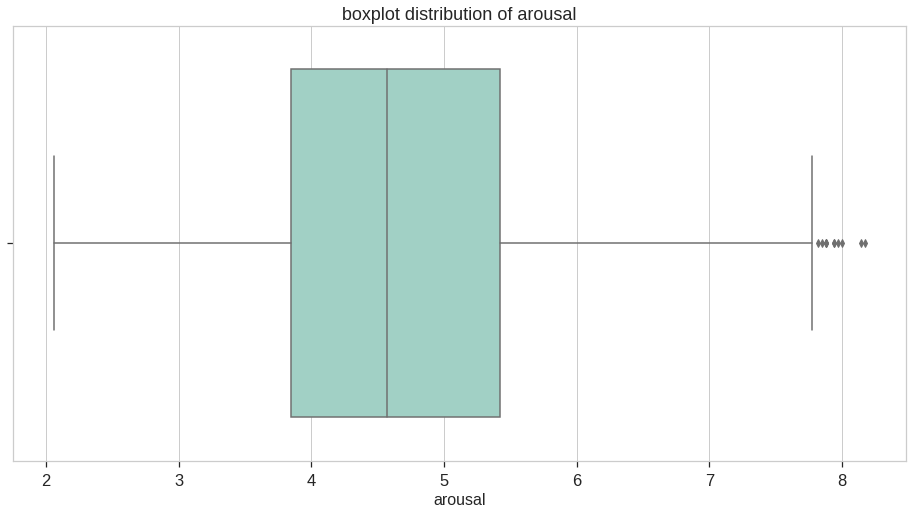

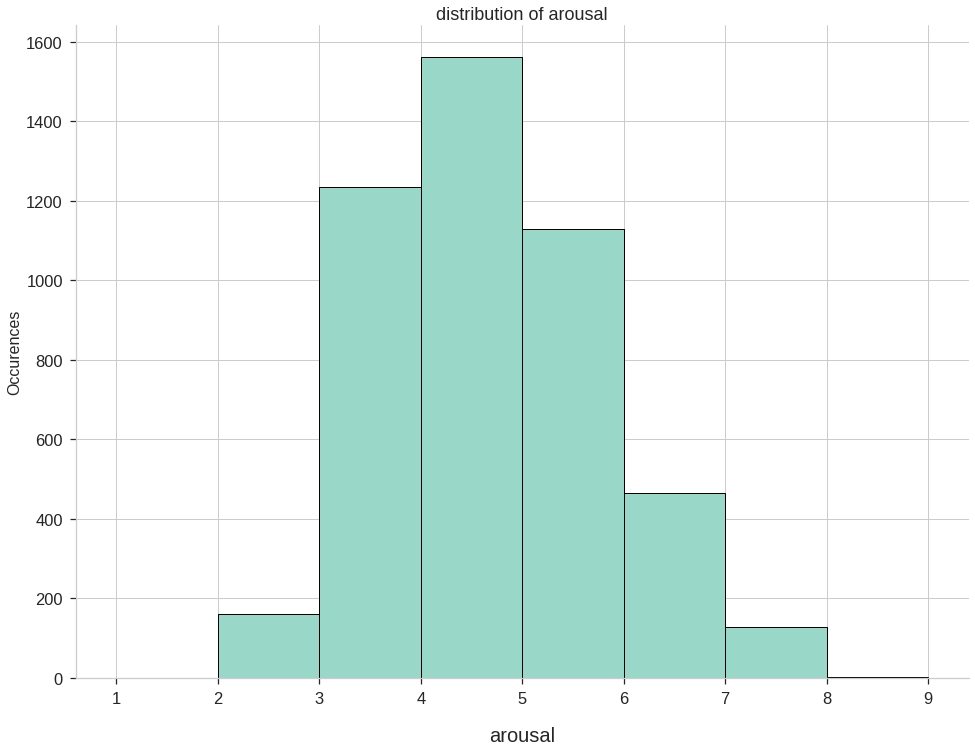

\begin{tabular}{lr}
\toprule
{} &      arousal \\
\midrule
count &  4682.000000 \\
mean  &     4.678129 \\
std   &     1.097163 \\
min   &     2.057000 \\
25\%   &     3.849000 \\
50\%   &     4.571000 \\
75\%   &     5.419000 \\
max   &     8.177000 \\
\bottomrule
\end{tabular}



In [11]:
#NOME VARIABILE DI INTERESSE
refvar="arousal"



#calcolo frequenza assoluta per aoa
df[refvar].value_counts()

#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = refvar, data=df, color = colors1[1])

#bellurie
boxplot_str="boxplot"
str1="distribution of"+" "+refvar
str2=boxplot_str+" "+str1
plt.title(str2, size = 18)
aoa_boxplot.set_xlabel(refvar, rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 12]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df[refvar].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(1,10),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
#bellurie
plt.title(str1, size = 18)
plt.xlabel(xlabel = refvar, fontsize = 20, labelpad=20)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)
plt.show()

aoa_descr=df[refvar].describe()

print(aoa_descr.to_latex())

Other comments



#### Valence

Brief description of the variables

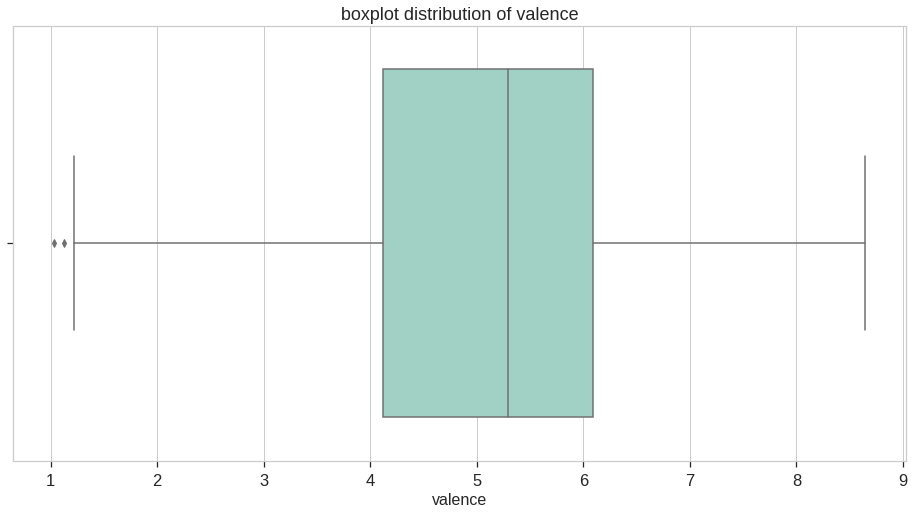

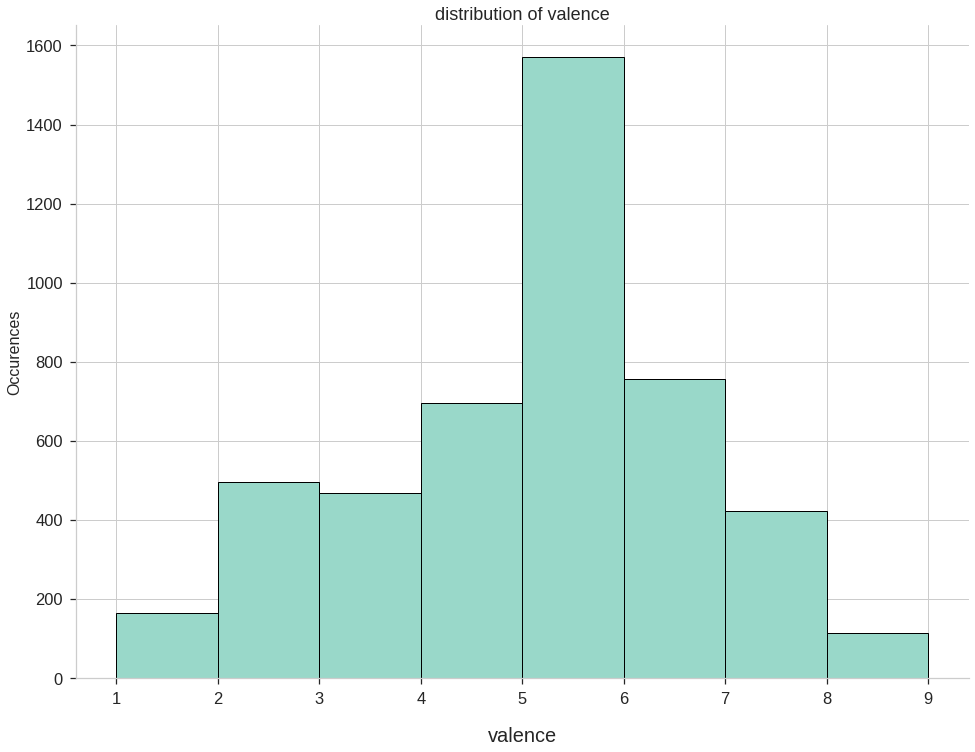

\begin{tabular}{lr}
\toprule
{} &      valence \\
\midrule
count &  4682.000000 \\
mean  &     5.086797 \\
std   &     1.594344 \\
min   &     1.030000 \\
25\%   &     4.115000 \\
50\%   &     5.290000 \\
75\%   &     6.088000 \\
max   &     8.647000 \\
\bottomrule
\end{tabular}



In [12]:
#NOME VARIABILE DI INTERESSE
refvar="valence"



#calcolo frequenza assoluta per aoa
df[refvar].value_counts()

#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = refvar, data=df, color = colors1[1])

#bellurie
boxplot_str="boxplot"
str1="distribution of"+" "+refvar
str2=boxplot_str+" "+str1
plt.title(str2, size = 18)
aoa_boxplot.set_xlabel(refvar, rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 12]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df[refvar].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(1,10),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
#bellurie
plt.title(str1, size = 18)
plt.xlabel(xlabel = refvar, fontsize = 20, labelpad=20)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)
plt.show()

aoa_descr=df[refvar].describe()

print(aoa_descr.to_latex())

Other comments



#### Dominance

Brief description of the variables

In [13]:
refvar="dominance"

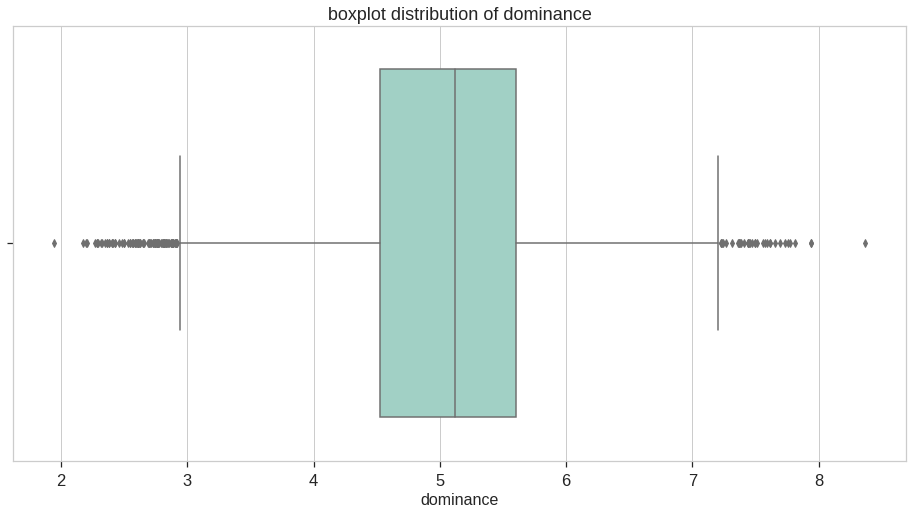

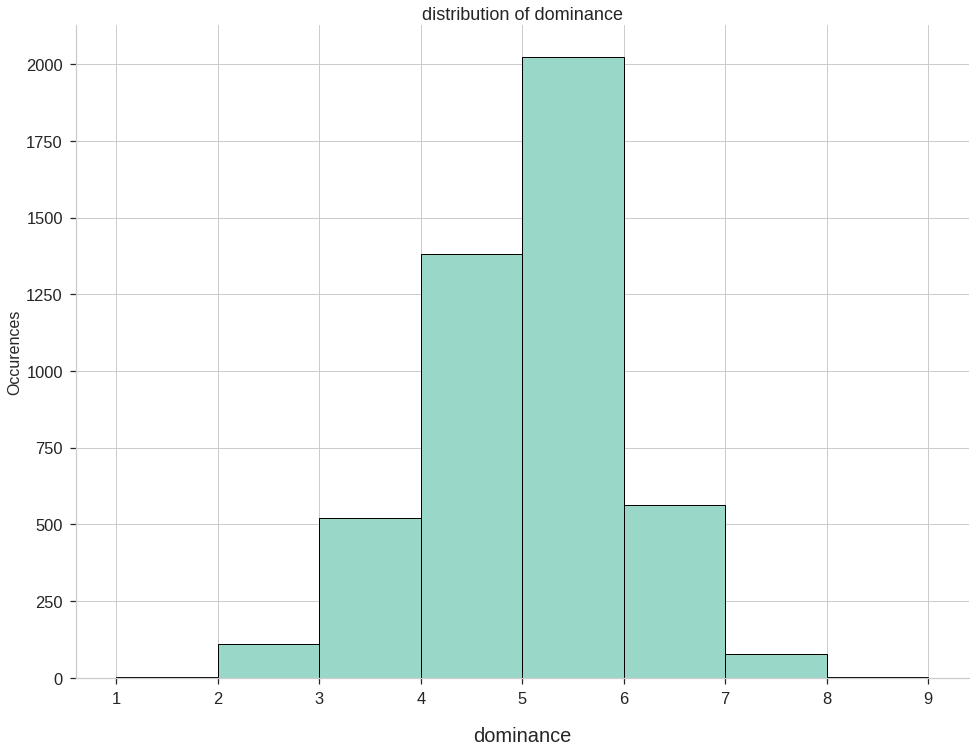

\begin{tabular}{lr}
\toprule
{} &    dominance \\
\midrule
count &  4682.000000 \\
mean  &     5.044939 \\
std   &     0.930669 \\
min   &     1.941000 \\
25\%   &     4.529000 \\
50\%   &     5.123000 \\
75\%   &     5.600000 \\
max   &     8.371000 \\
\bottomrule
\end{tabular}



In [14]:
#calcolo frequenza assoluta per aoa
df[refvar].value_counts()

#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = refvar, data=df, color = colors1[1])

#bellurie
boxplot_str="boxplot"
str1="distribution of"+" "+refvar
str2=boxplot_str+" "+str1
plt.title(str2, size = 18)
aoa_boxplot.set_xlabel(refvar, rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 12]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df[refvar].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(1,10),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
#bellurie
plt.title(str1, size = 18)
plt.xlabel(xlabel = refvar, fontsize = 20, labelpad=20)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)
plt.show()

aoa_descr=df[refvar].describe()

print(aoa_descr.to_latex())

Other comments



#### Concreteness

(numerical): represents the degree to which something can be experienced by our senses. It ranges from 1, abstract words, to 7, concrete words. 

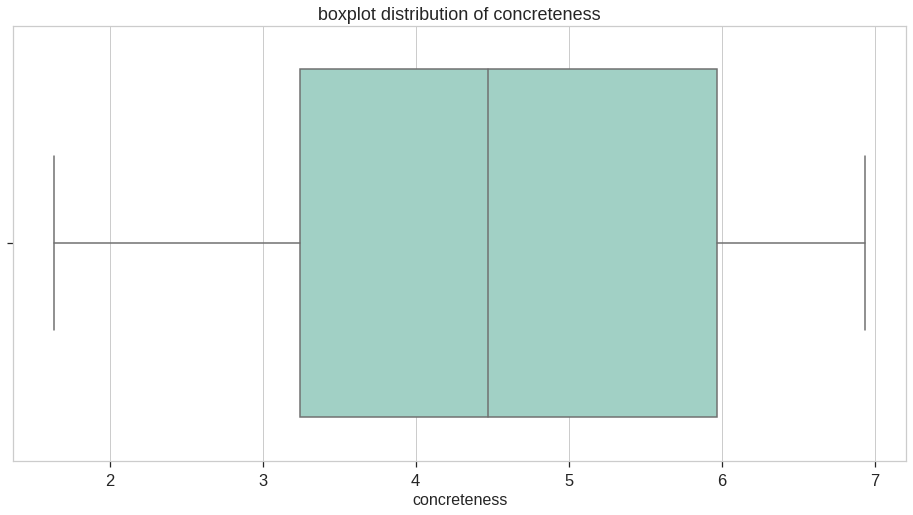

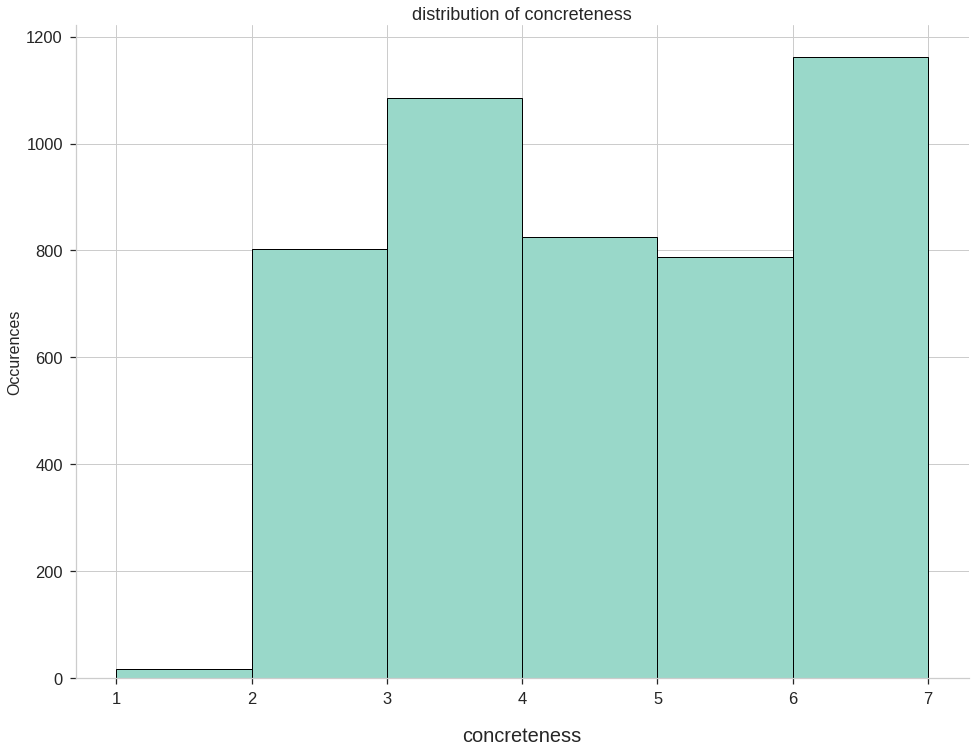

\begin{tabular}{lr}
\toprule
{} &  concreteness \\
\midrule
count &   4682.000000 \\
mean  &      4.566273 \\
std   &      1.433689 \\
min   &      1.636000 \\
25\%   &      3.242000 \\
50\%   &      4.471000 \\
75\%   &      5.971000 \\
max   &      6.938000 \\
\bottomrule
\end{tabular}



In [15]:
#NOME VARIABILE DI INTERESSE
refvar="concreteness"



#calcolo frequenza assoluta per aoa
df[refvar].value_counts()

#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = refvar, data=df, color = colors1[1])

#bellurie
boxplot_str="boxplot"
str1="distribution of"+" "+refvar
str2=boxplot_str+" "+str1
plt.title(str2, size = 18)
aoa_boxplot.set_xlabel(refvar, rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 12]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df[refvar].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(1,8),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
#bellurie
plt.title(str1, size = 18)
plt.xlabel(xlabel = refvar, fontsize = 20, labelpad=20)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)
plt.show()

aoa_descr=df[refvar].describe()

print(aoa_descr.to_latex())

Other comments



#### Imageability

(numerical): measures how difficult is to generate a mental image of something. It ranges from 1, hard to imagine, to 7, easy to imagine. 

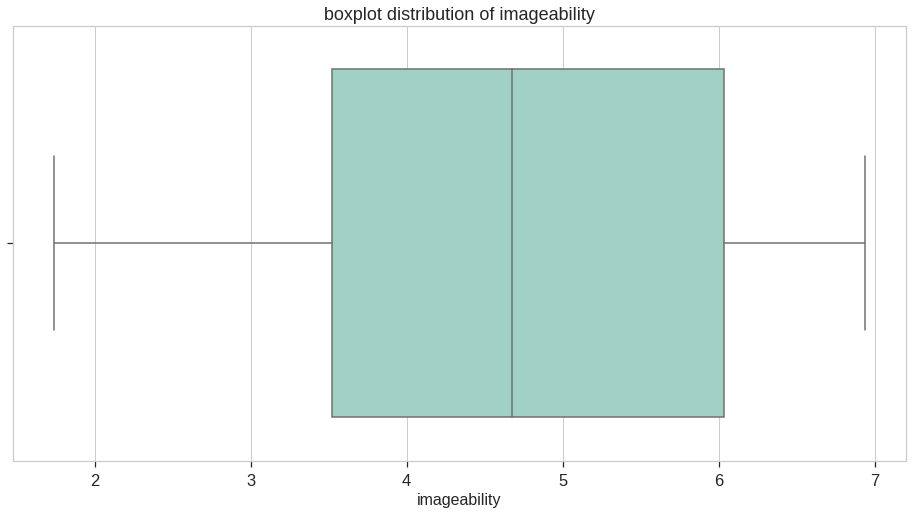

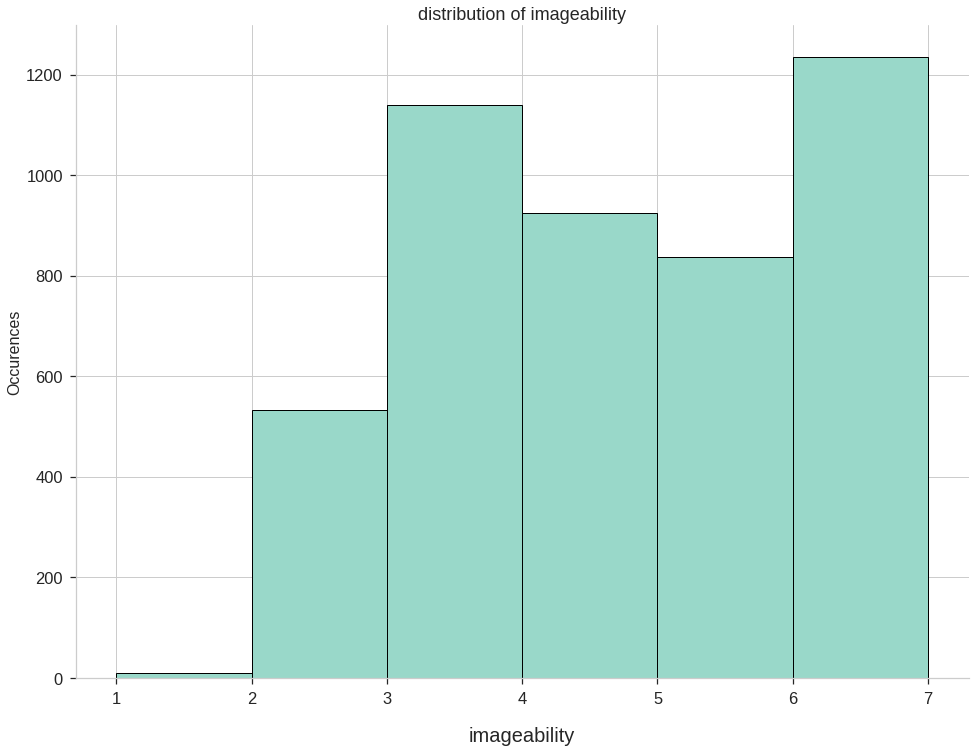

\begin{tabular}{lr}
\toprule
{} &  imageability \\
\midrule
count &   4682.000000 \\
mean  &      4.723018 \\
std   &      1.363110 \\
min   &      1.737000 \\
25\%   &      3.519250 \\
50\%   &      4.677000 \\
75\%   &      6.032000 \\
max   &      6.941000 \\
\bottomrule
\end{tabular}



In [16]:
#NOME VARIABILE DI INTERESSE
refvar="imageability"



#calcolo frequenza assoluta per aoa
df[refvar].value_counts()

#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = refvar, data=df, color = colors1[1])

#bellurie
boxplot_str="boxplot"
str1="distribution of"+" "+refvar
str2=boxplot_str+" "+str1
plt.title(str2, size = 18)
aoa_boxplot.set_xlabel(refvar, rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 12]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df[refvar].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(1,8),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
#bellurie
plt.title(str1, size = 18)
plt.xlabel(xlabel = refvar, fontsize = 20, labelpad=20)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)
plt.show()

aoa_descr=df[refvar].describe()

print(aoa_descr.to_latex())

Other comments



#### Familiarity

(numerical): is a measure of a word’s subjective experience. The range is from 1 (unfamiliar) to 7 (familiar). 


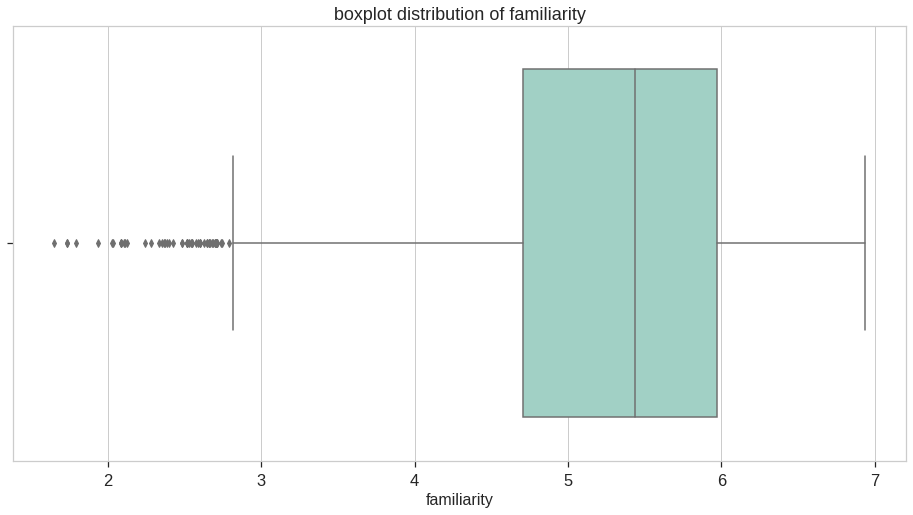

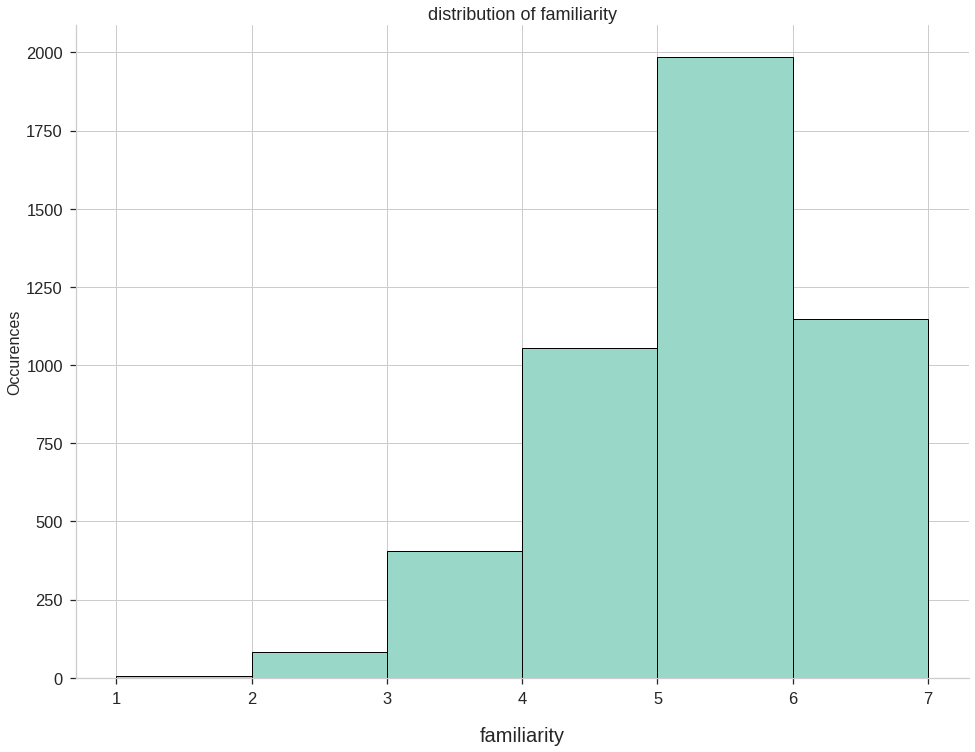

\begin{tabular}{lr}
\toprule
{} &  familiarity \\
\midrule
count &  4682.000000 \\
mean  &     5.271335 \\
std   &     0.921218 \\
min   &     1.647000 \\
25\%   &     4.706000 \\
50\%   &     5.438000 \\
75\%   &     5.969000 \\
max   &     6.939000 \\
\bottomrule
\end{tabular}



In [17]:
#NOME VARIABILE DI INTERESSE
refvar="familiarity"



#calcolo frequenza assoluta per aoa
df[refvar].value_counts()

#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = refvar, data=df, color = colors1[1])

#bellurie
boxplot_str="boxplot"
str1="distribution of"+" "+refvar
str2=boxplot_str+" "+str1
plt.title(str2, size = 18)
aoa_boxplot.set_xlabel(refvar, rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 12]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df[refvar].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(1,8),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
#bellurie
plt.title(str1, size = 18)
plt.xlabel(xlabel = refvar, fontsize = 20, labelpad=20)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)
plt.show()

aoa_descr=df[refvar].describe()

print(aoa_descr.to_latex())

Other comments

#### Age of Aquisition

The variable age of aquisition (aoa) indicates the supposed age in which that person first learned that specific word. Clearly it is not easy to remember at which age a word is learned, and for that reason in this dataset this variables refears to an estimation of the age of aquisition. The scale is defined as a series of consecutive 2-year periods from the ages of 2 and 12 years, and a final period referring to 13 years and older. This shows how we have 7 different ranges, 0-2, 2-4, 4-6, 6-8, 8-10-, 10-12 and 13+.

In [18]:
#calcolo frequenza assoluta per aoa
df["aoa"].value_counts()

5.000    45
4.000    29
3.029    24
4.657    23
5.029    22
         ..
5.278     1
6.036     1
6.633     1
5.839     1
1.871     1
Name: aoa, Length: 953, dtype: int64

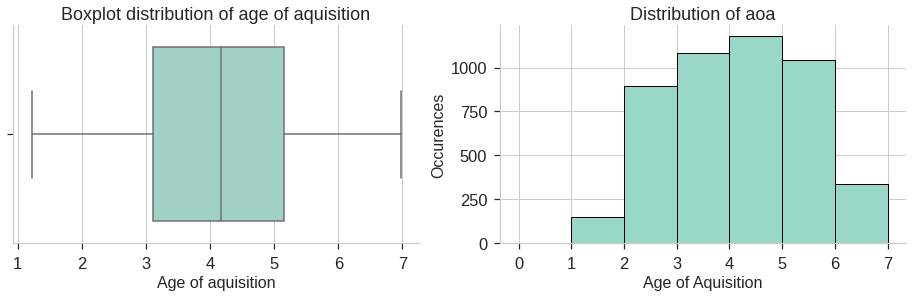

In [19]:
#imposto lo spazio
colors1 = ['#e5f5f9','#99d8c9','#2ca25f']
plt.rcParams["figure.figsize"] = [16, 4]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})
plt.subplot(1, 2, 1)
#distribuzione e tendenze centrali: boxplot
aoa_boxplot = sb.boxplot( x = "aoa", data=df, color = colors1[1])
plt.title("Boxplot distribution of age of aquisition", size = 18)
aoa_boxplot.set_xlabel("Age of aquisition", rotation = "horizontal", size = 16)
plt.subplot(1, 2, 2)

aoa1= df["aoa"].dropna(0, inplace = False)

#imposto la legenda (da rivedere)
#lables_aoa= [0-2, 2-4, 4-6, 6-8, 8-10, 10-12, 13]
#plt.legend(title="Age of aquisition ranges", title_fontsize = 14, bbox_to_anchor=(1, 1), labels=lables_aoa )

#distribuzione e tendenze centrali: istogramma
aoa_hist = plt.hist(aoa1,  color = colors1[1],edgecolor='black',bins=range(0,8))

plt.title("Distribution of aoa", size = 18)
plt.xlabel(xlabel = "Age of Aquisition", fontsize = 16)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)

plt.show()

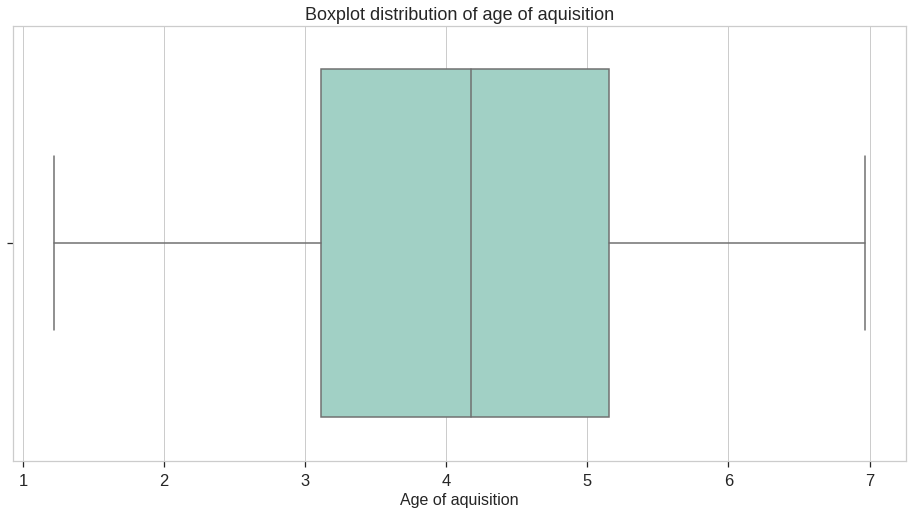

In [20]:
colors1 = ['#e5f5f9','#99d8c9','#2ca25f']
plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = "aoa", data=df, color = colors1[1])
plt.title("Boxplot distribution of age of aquisition", size = 18)
aoa_boxplot.set_xlabel("Age of aquisition", rotation = "horizontal", size = 16)

plt.show()

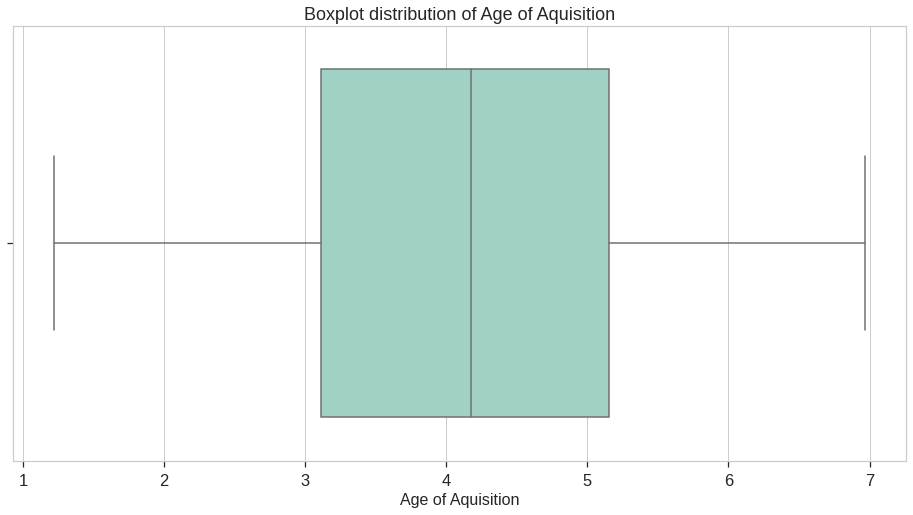

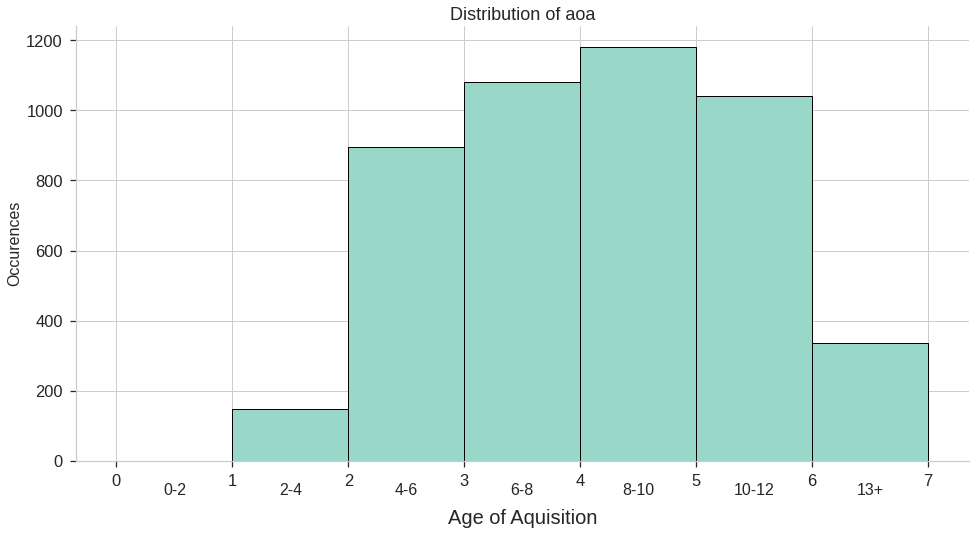

\begin{tabular}{lr}
\toprule
{} &          aoa \\
\midrule
count &  4682.000000 \\
mean  &     4.143427 \\
std   &     1.252770 \\
min   &     1.219000 \\
25\%   &     3.114000 \\
50\%   &     4.177000 \\
75\%   &     5.152000 \\
max   &     6.971000 \\
\bottomrule
\end{tabular}



In [21]:
colors1 = ['#e5f5f9','#99d8c9','#2ca25f']


#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = "aoa", data=df, color = colors1[1])
plt.title("Boxplot distribution of Age of Aquisition", size = 18)
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for i, x in zip(range(0,7), bin_centers):
    # Label the raw counts
    age_range=['0-2','2-4','4-6','6-8','8-10','10-12','13+']
    ax.annotate(age_range[i], xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -22), textcoords='offset points',fontsize=16, va='top', ha='center')


aoa_boxplot.set_xlabel("Age of Aquisition", rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df["aoa"].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(0,8),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for i, x in zip(range(0,7), bin_centers):
    # Label the raw counts
    age_range=['0-2','2-4','4-6','6-8','8-10','10-12','13+']
    ax.annotate(age_range[i], xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -22), textcoords='offset points',fontsize=16, va='top', ha='center')

    # Label the percentages
    #percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    #ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        #xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
#plt.subplots_adjust(bottom=0.50)
plt.title("Distribution of aoa", size = 18)
plt.xlabel(xlabel = "Age of Aquisition", fontsize = 20, labelpad=20)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)
plt.show()

aoa_descr=df["aoa"].describe()

print(aoa_descr.to_latex())

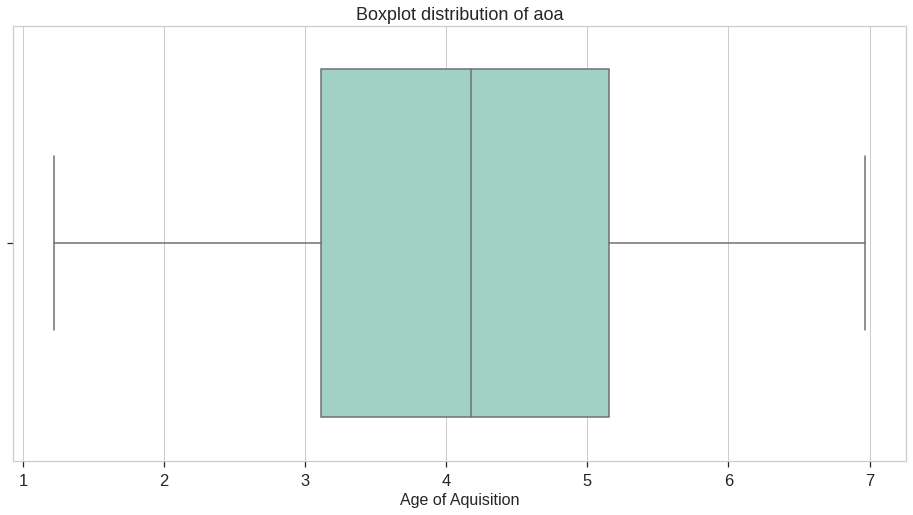

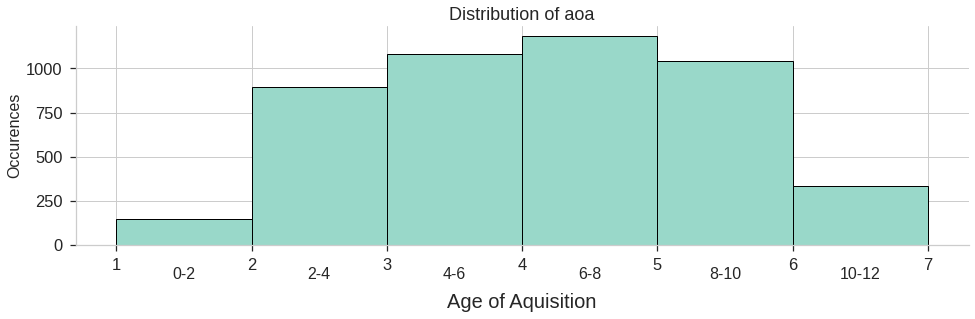

\begin{tabular}{lr}
\toprule
{} &          aoa \\
\midrule
count &  4682.000000 \\
mean  &     4.143427 \\
std   &     1.252770 \\
min   &     1.219000 \\
25\%   &     3.114000 \\
50\%   &     4.177000 \\
75\%   &     5.152000 \\
max   &     6.971000 \\
\bottomrule
\end{tabular}



In [22]:
colors1 = ['#e5f5f9','#99d8c9','#2ca25f']

refvar="aoa"

#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = refvar, data=df, color = colors1[1])

#bellurie

plt.title("Boxplot distribution of aoa", size = 18)
aoa_boxplot.set_xlabel("Age of Aquisition", rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df[refvar].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(1,8),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for i, x in zip(range(0,7), bin_centers):
    # Label the raw counts
    age_range=['0-2','2-4','4-6','6-8','8-10','10-12','13+']
    ax.annotate(age_range[i], xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -22), textcoords='offset points',fontsize=16, va='top', ha='center')

    # Label the percentages
    #percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    #ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        #xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.50)

# Label the raw counts and the percentages below the x-axis...
#bellurie
plt.title("Distribution of aoa", size = 18)
plt.xlabel(xlabel = "Age of Aquisition", fontsize = 20, labelpad=20)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)
plt.show()

aoa_descr=df[refvar].describe()

print(aoa_descr.to_latex())

In [23]:
aoa_descr=df["aoa"].describe()

print(aoa_descr.to_latex())

\begin{tabular}{lr}
\toprule
{} &          aoa \\
\midrule
count &  4682.000000 \\
mean  &     4.143427 \\
std   &     1.252770 \\
min   &     1.219000 \\
25\%   &     3.114000 \\
50\%   &     4.177000 \\
75\%   &     5.152000 \\
max   &     6.971000 \\
\bottomrule
\end{tabular}



There are 4682 occurrences for this variable. That means that there are no missing values, or NaN. The mean is 4.14, and the standard deviation is 1.25.

#### Size

In this dataset "size" is a measure of magnitude expressed in either concrete or abstarct terms (big, small). That is, if a word can be associated with adjectives like big or small (e.g. palace or mountain for concrete object, and knowledge or love for abstarct ideas).

In [24]:
#calcolo frequenza assoluta per aoa
df["semsize"].value_counts()

4.000    52
5.000    42
3.000    35
4.971    27
4.677    26
         ..
5.241     1
5.891     1
4.160     1
6.281     1
5.867     1
Name: semsize, Length: 939, dtype: int64

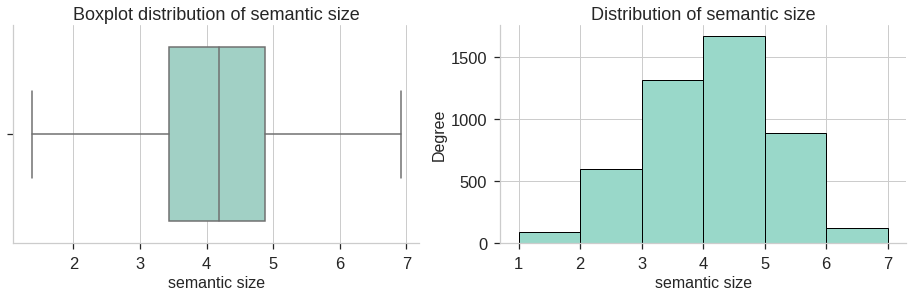

In [25]:
#imposto lo spazio
colors1 = ['#e5f5f9','#99d8c9','#2ca25f']
plt.rcParams["figure.figsize"] = [16, 4]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})
plt.subplot(1, 2, 1)
#distribuzione e tendenze centrali: boxplot
aoa_boxplot = sb.boxplot( x = "semsize", data=df, color = colors1[1])
plt.title("Boxplot distribution of semantic size", size = 18)
aoa_boxplot.set_xlabel("semantic size", rotation = "horizontal", size = 16)
plt.subplot(1, 2, 2)

size1= df["semsize"].dropna(0, inplace = False)

#imposto la legenda (da rivedere)
#lables_size= [0-2, 2-4, 4-6, 6-8, 8-10, 10-12, 13]
#plt.legend(title="Age of aquisition ranges", title_fontsize = 14, bbox_to_anchor=(1, 1), labels=lables_size )
#distribuzione e tendenze centrali: istogramma
aoa_hist = plt.hist(size1,  color = colors1[1],edgecolor='black',bins=range(1,8))

#BELLURIE

plt.title("Distribution of semantic size", size = 18)
plt.xlabel(xlabel = "semantic size", fontsize = 16)
plt.ylabel(ylabel = "Degree", fontsize = 16)
sb.despine(right = True)

plt.show()

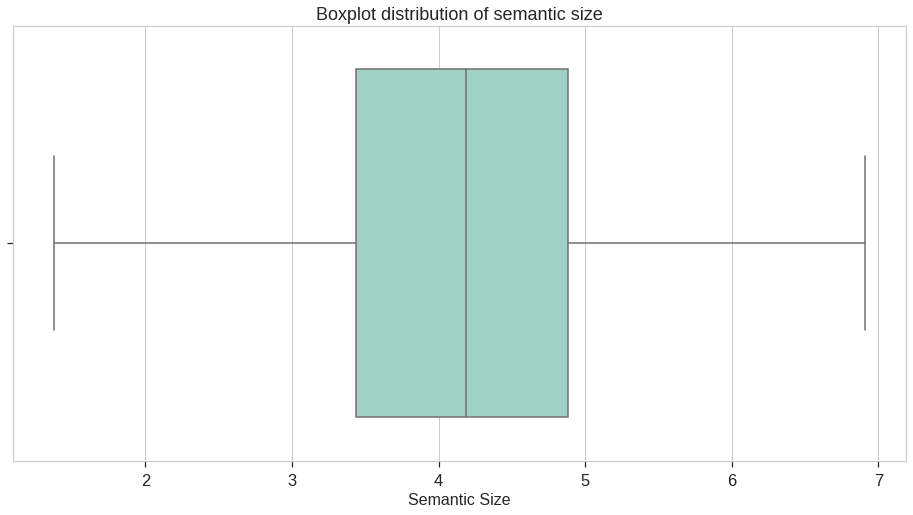

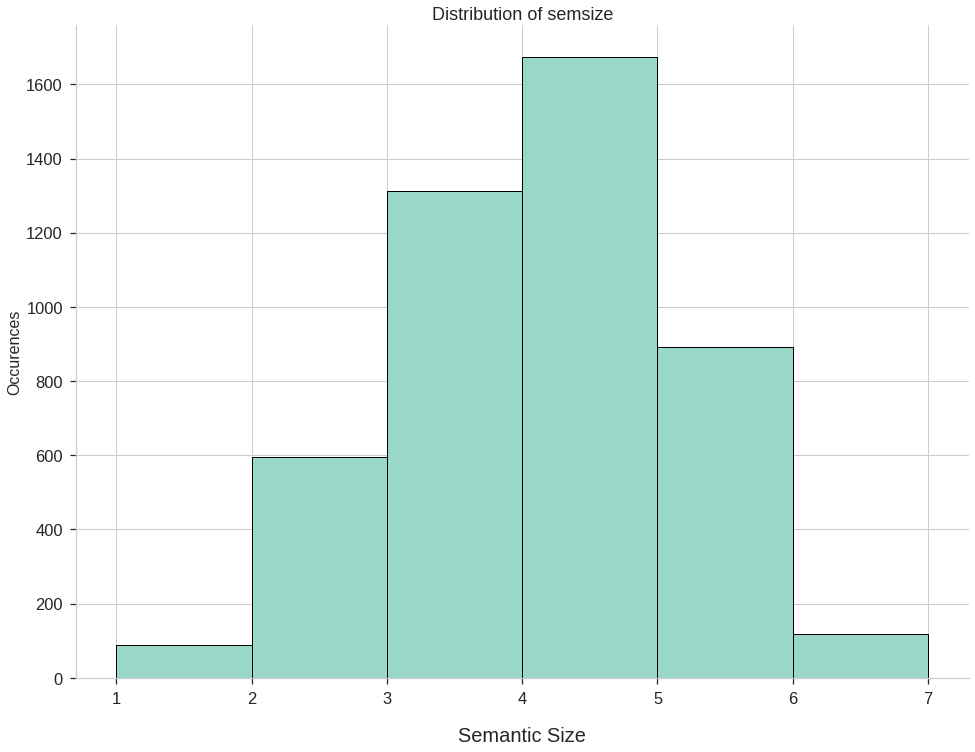

\begin{tabular}{lr}
\toprule
{} &      semsize \\
\midrule
count &  4682.000000 \\
mean  &     4.136403 \\
std   &     1.023293 \\
min   &     1.375000 \\
25\%   &     3.438000 \\
50\%   &     4.186500 \\
75\%   &     4.882000 \\
max   &     6.912000 \\
\bottomrule
\end{tabular}



In [26]:
colors1 = ['#e5f5f9','#99d8c9','#2ca25f']

refvar="semsize"

#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = refvar, data=df, color = colors1[1])

#bellurie

plt.title("Boxplot distribution of semantic size", size = 18)
aoa_boxplot.set_xlabel("Semantic Size", rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 12]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df[refvar].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(1,8),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
#bellurie
plt.title("Distribution of semsize", size = 18)
plt.xlabel(xlabel = "Semantic Size", fontsize = 20, labelpad=20)
plt.ylabel(ylabel = "Occurences", fontsize = 16)
sb.despine(right = True)
plt.show()

aoa_descr=df[refvar].describe()

print(aoa_descr.to_latex())

In [27]:
df["semsize"].describe()

count    4682.000000
mean        4.136403
std         1.023293
min         1.375000
25%         3.438000
50%         4.186500
75%         4.882000
max         6.912000
Name: semsize, dtype: float64

The count of occurrences for this variable suggests that there are no missing values. The mean is 4.13 and the standard deviation is just above 1. This results suggests that the tendency is that is more common to think that a word has a bigger semantic size.

#### Gender

Gender in this dataset refers to how strongly its meaning is associated with male or female behaviour or idea. This variable could be very interesting in regards of the social bias that might, or might not, be present.

In [28]:
#calcolo frequenza assoluta per aoa
df["gender"].value_counts()

4.000    86
5.000    39
3.971    32
4.500    29
4.029    28
         ..
3.129     1
4.861     1
1.743     1
4.080     1
6.588     1
Name: gender, Length: 1022, dtype: int64

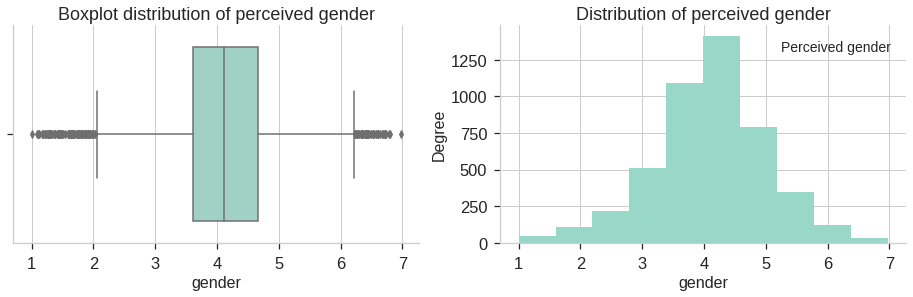

In [29]:
#imposto lo spazio
colors1 = ['#e5f5f9','#99d8c9','#2ca25f']
plt.rcParams["figure.figsize"] = [16, 4]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})
plt.subplot(1, 2, 1)
#distribuzione e tendenze centrali: boxplot
gender_boxplot = sb.boxplot( x = "gender", data=df, color = colors1[1])
plt.title("Boxplot distribution of perceived gender", size = 18)
gender_boxplot.set_xlabel("gender", rotation = "horizontal", size = 16)
plt.subplot(1, 2, 2)

gender1= df["gender"].dropna(0, inplace = False)

#imposto la legenda
lables_size= [0-2, 2-4, 4-6, 6-8, 8-10, 10-12, 13]
plt.legend(title="Perceived gender", title_fontsize = 14, bbox_to_anchor=(1, 1), labels=lables_size )
#distribuzione e tendenze centrali: istogramma
aoa_hist = plt.hist(gender1,  color = colors1[1])
plt.title("Distribution of perceived gender", size = 18)
plt.xlabel(xlabel = "gender", fontsize = 16)
plt.ylabel(ylabel = "Degree", fontsize = 16)
sb.despine(right = True)

plt.show()

In [30]:
df["gender"].describe()

count    4682.000000
mean        4.099933
std         0.912293
min         1.000000
25%         3.606000
50%         4.121000
75%         4.656000
max         6.971000
Name: gender, dtype: float64

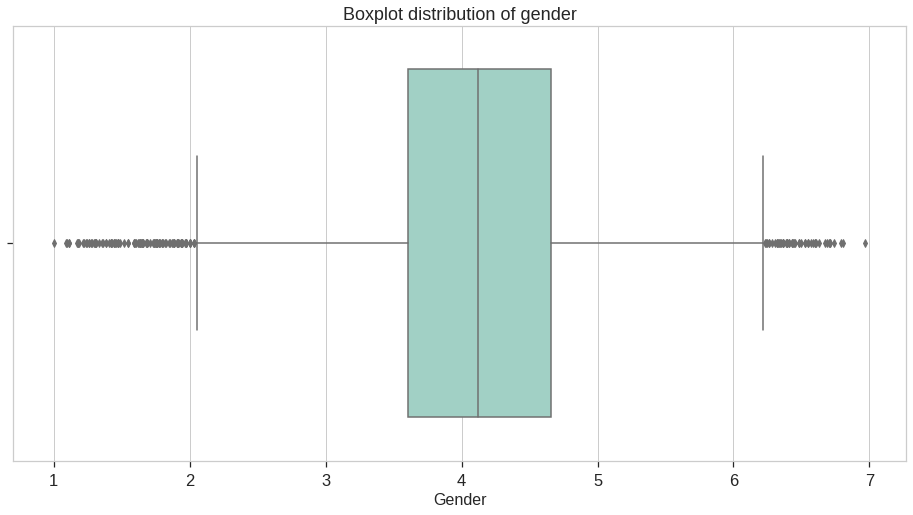

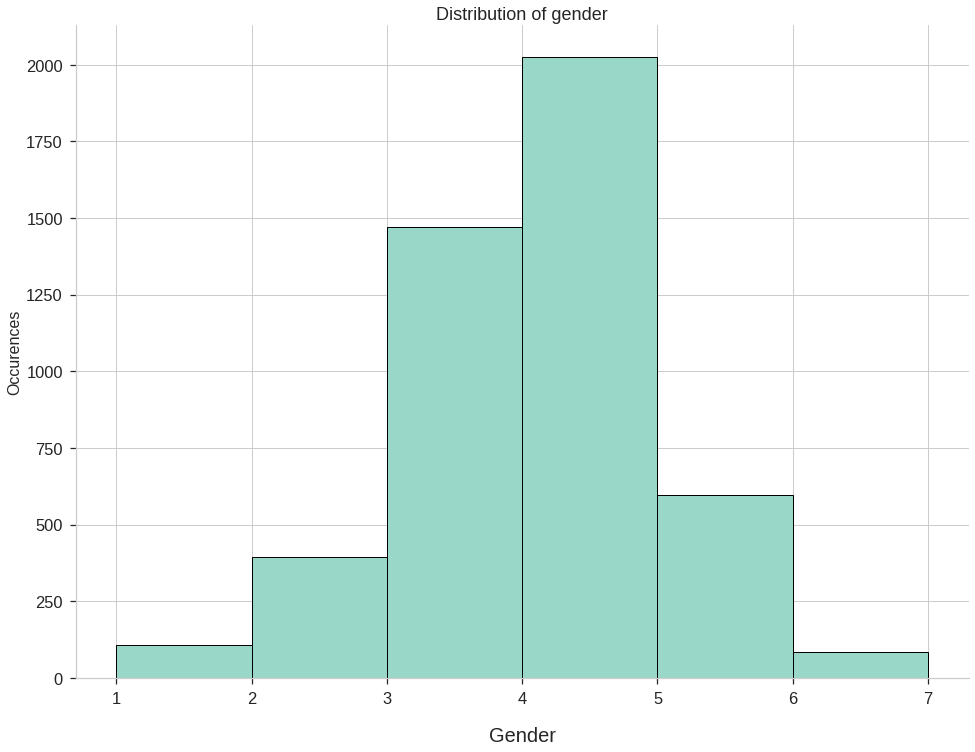

\begin{tabular}{lr}
\toprule
{} &       gender \\
\midrule
count &  4682.000000 \\
mean  &     4.099933 \\
std   &     0.912293 \\
min   &     1.000000 \\
25\%   &     3.606000 \\
50\%   &     4.121000 \\
75\%   &     4.656000 \\
max   &     6.971000 \\
\bottomrule
\end{tabular}



In [31]:
import matplotlib.ticker as mticker
colors1 = ['#e5f5f9','#99d8c9','#2ca25f']

refvar="gender"

#BOXPLOT

plt.rcParams["figure.figsize"] = [16, 8]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa_boxplot = sb.boxplot( x = refvar, data=df, color = colors1[1])

#bellurie

plt.title("Boxplot distribution of gender", size = 18)
aoa_boxplot.set_xlabel("Gender", rotation = "horizontal", size = 16)



#DISTRIBUTION
plt.rcParams["figure.figsize"] = [16, 12]
sb.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize": 16,"axes.labelsize": 12})

aoa1= df[refvar].dropna(0, inplace = False)

data = aoa1
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,color = colors1[1], bins=range(1,8),edgecolor='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Label the raw counts and the percentages below the x-axis...
#bellurie
plt.title("Distribution of gender", size = 18)
plt.xlabel(xlabel = "Gender", fontsize = 20, labelpad=20)


plt.ylabel(ylabel = "Occurences", fontsize = 16)


ax.xaxis.set_minor_locator(mticker.FixedLocator((1, 7)))
ax.xaxis.set_minor_formatter(mticker.FixedFormatter(("Label A", "Label B")))
plt.setp(ax.yaxis.get_minorticklabels(), size=15, va="center")
ax.tick_params("x",which="minor",pad=25, left=False)

sb.despine(right = True)
plt.show()

aoa_descr=df[refvar].describe()

print(aoa_descr.to_latex())

This variable is not self intuitive. There is no visible correlation from the number and the perceived gender of that word. A supposition is that the higher the value, the more "masculine" the word is perceived. For example the word "actor" has a perceived gender value of 5.588, where the max value is 6.971.

Also it seems that the distribution is heavly centered, leaving a significant amount of outliers, as seen in the figure above.

In [32]:
 df.loc[[51, 52]]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
51,actor,5,5.515,6.281,5.618,5.700,5.970,6.065,3.371,4.455,5.588,0,16282891.0
52,actress,7,5.719,5.939,5.121,6.031,6.576,5.846,3.412,4.147,1.303,0,7010056.0


## 1.2    Distribution of variables and statistics


Codice per le distribuzioni delle variabili 'arousal', 'valence', 'dominance', 'concreteness','imageability', 'familiarity'


arousal


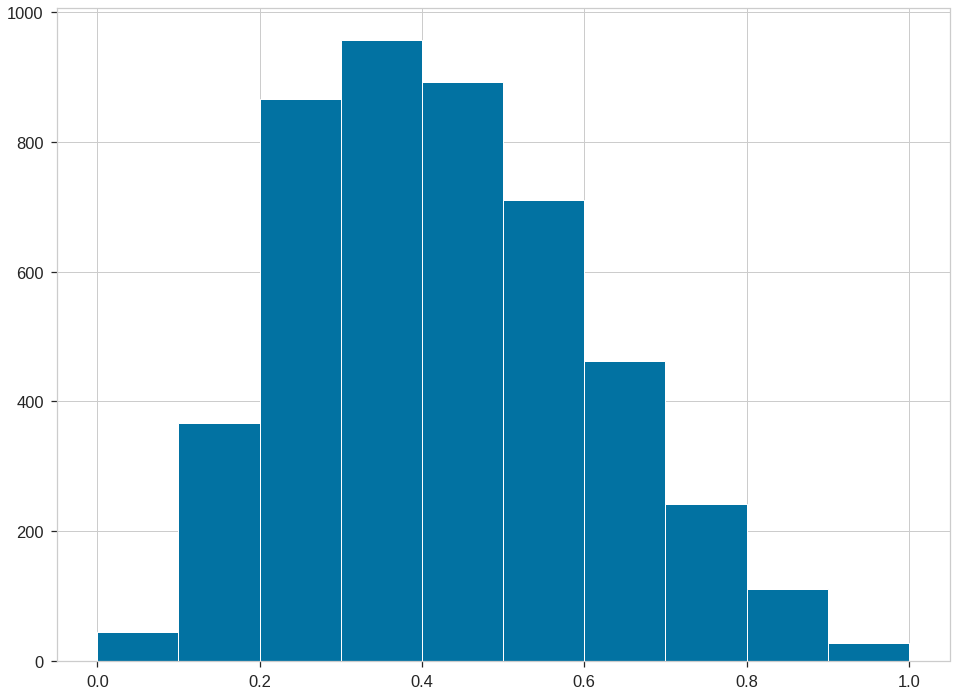

valence


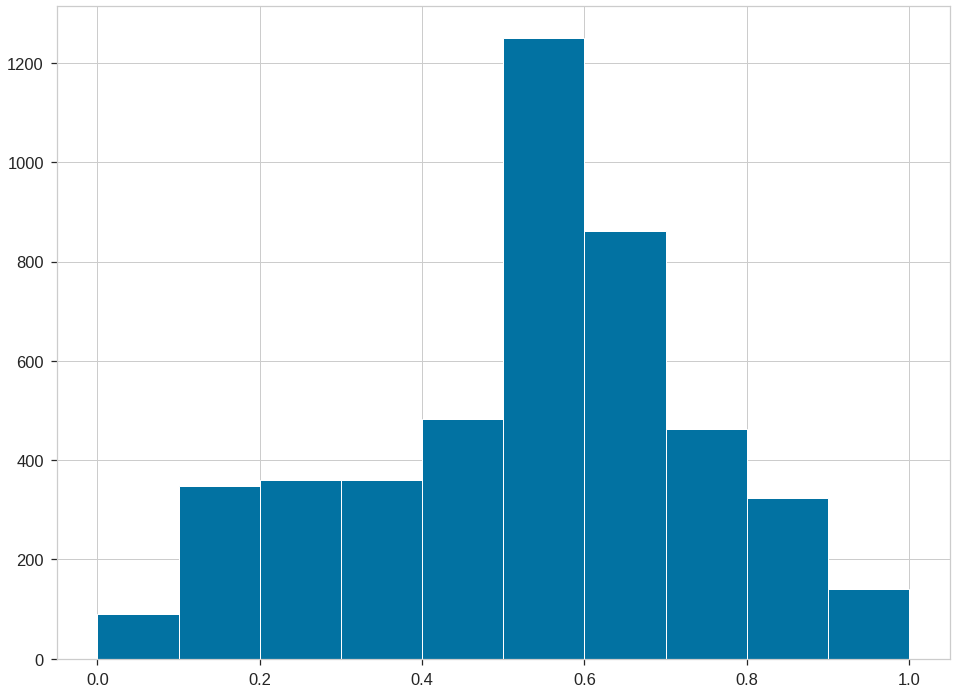

dominance


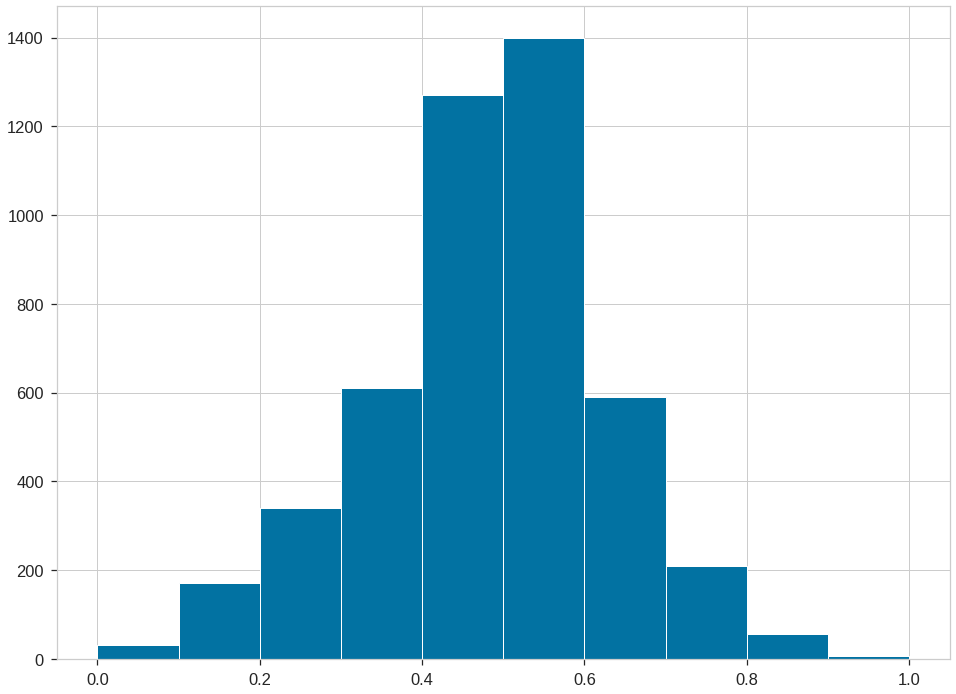

concreteness


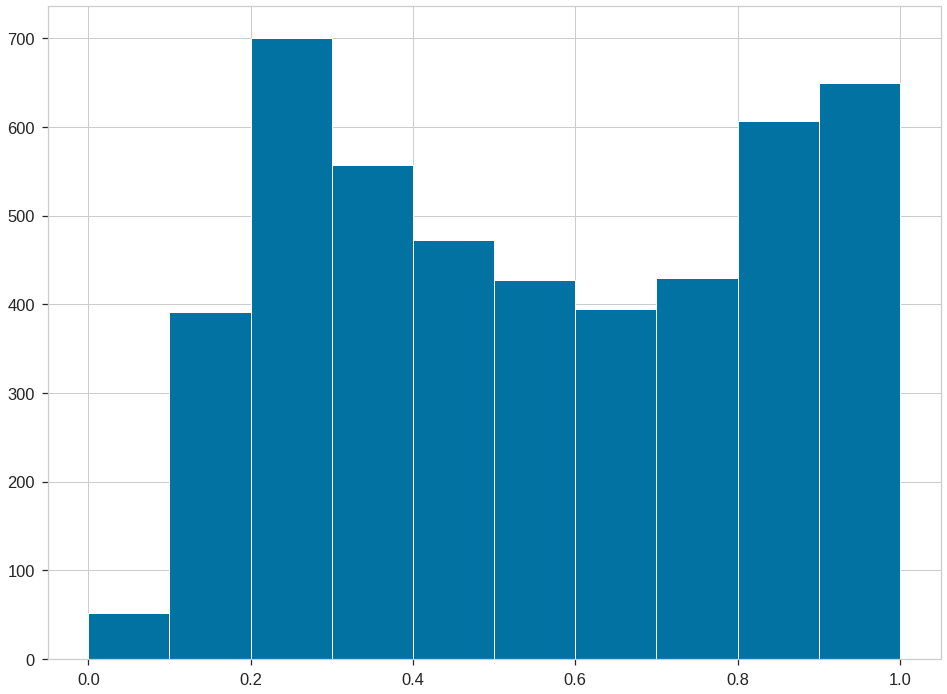

imageability


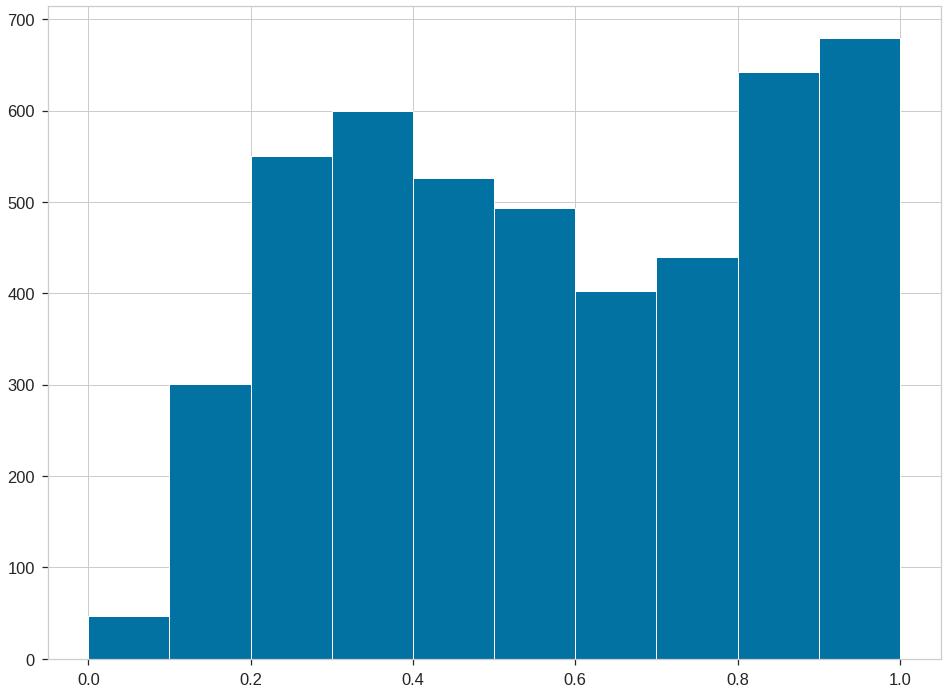

familiarity


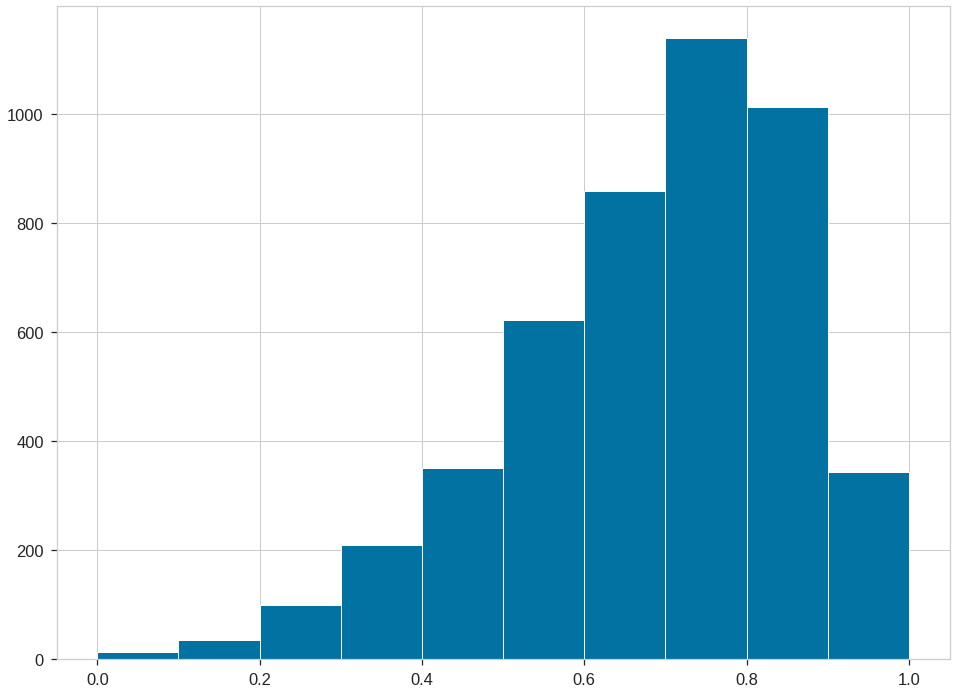

8.094831268688594 91.9051687313114


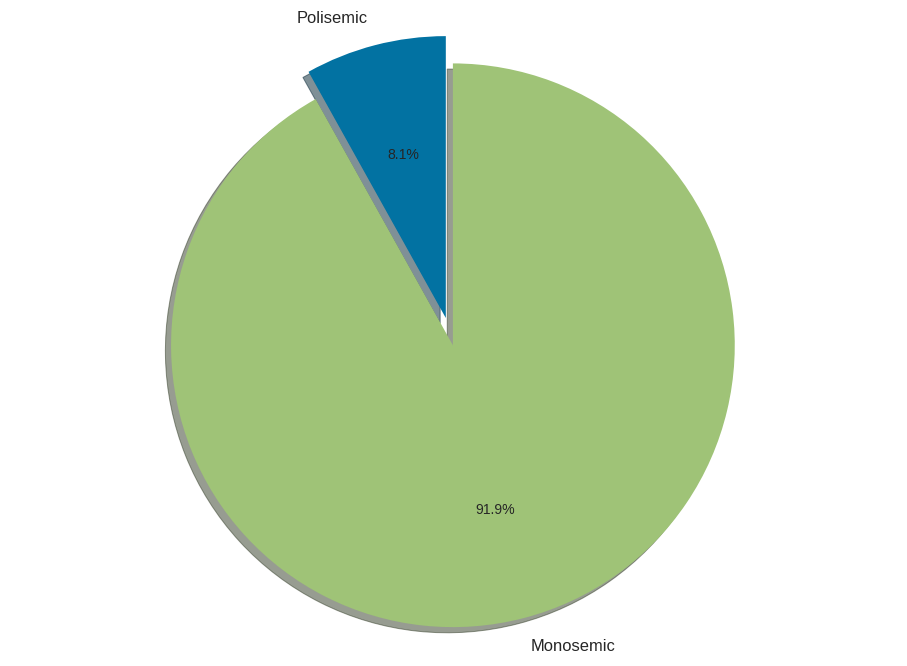

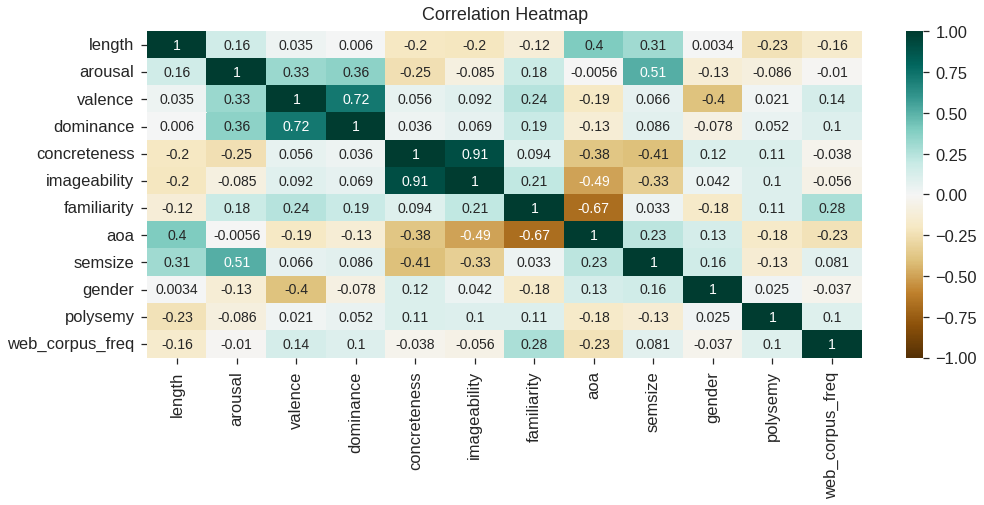

In [33]:
df.corr() #matrice di correlazione

#distribuzione delle variabili
scaler = MinMaxScaler()

var = ['arousal', 'valence', 'dominance', 'concreteness',
       'imageability', 'familiarity']

for e in var:
    print(e)
    Y = df[[e]].values
    Y_minmax = scaler.fit_transform(Y)
    plt.hist(Y_minmax, edgecolor='white')
    plt.show()

#piechart polisemia

#percentuale delle polisemiche 
m = 0
p = 0

for e in df['polysemy'].values:
    if e == 1:
        p += 1
    if e == 0:
        m += 1

p1 = p/(p+m)*100
m1 = m/(p+m)*100
print(p1, m1)

#grafico
labels = 'Polisemic', 'Monosemic'
sizes = [p1, m1]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#matrice di correlazione
corr=df.corr()
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
#sb.heatmap(corr, cmap="Blues", annot=True)



### 1.2.1    Variable Normalization

## 1.3    Assessing Data Quality

### 1.3.1    Missing Values

In [34]:
df.isnull().sum()

word                0
length              0
arousal             0
valence             0
dominance           0
concreteness        0
imageability        0
familiarity         0
aoa                 0
semsize             0
gender              0
polysemy            0
web_corpus_freq    14
dtype: int64

The dataset seems to be almost without null values. In fact, there are only 14 NaN, and all are concentrated in the "web_corpus_freq" variable.

In [35]:
df[df['web_corpus_freq'].isnull()]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
585,burgle,6,5.118,2.303,3.656,4.970,5.424,5.200,3.735,4.697,5.333,0,NaN
753,Christmas,9,7.516,7.914,5.600,5.086,6.571,6.710,1.600,6.394,3.771,0,NaN
1070,Dad,3,4.912,6.849,4.618,6.257,6.400,6.853,1.265,5.147,6.706,0,NaN
1076,Dame,4,4.194,5.594,5.469,5.125,4.969,3.697,4.969,4.548,1.242,0,NaN
1540,Facebook,8,4.971,4.857,4.486,5.943,6.229,6.829,6.314,5.114,4.171,0,NaN
1559,FALSE,5,4.636,2.941,4.206,3.455,2.765,5.700,3.086,4.500,4.353,0,NaN
2673,Mom,3,5.667,7.936,4.813,6.424,6.250,6.594,1.333,5.094,1.097,0,NaN
2724,Mum,3,4.594,7.938,4.219,6.091,6.625,6.906,1.219,5.061,1.212,0,NaN
2726,Mummy,5,5.364,7.471,4.879,5.794,6.515,6.182,1.771,4.677,1.455,0,NaN
3773,skijump,7,5.914,5.771,5.486,6.200,6.529,4.758,5.028,5.389,5.000,0,NaN


Looking at the values that are present in the dataset but are not present in the web corpus, we can spot some similarities.
There are 3 recurrences of the same word but slightly different from one another: "Mom", "Mum" and "Mommy". Also the word "Dad" is not present in the corpus.

In addition, there are 3 words written with full capital letters: "FALSE", "TRUE", and "TV". If the corpus is case sensitive, that could be an explaination of why those words are not present.

Finally, there are 2 words of social media that are absent in the corpus: "Facebook" and "Twitter". This is a bit strange since those 2 words are really known.

### 1.3.2    Outliers

In [36]:
#creating a copy of the df
df2 = df.copy()
#dropping some variables for boxplot visualzation
df3 = df2.drop(["word","web_corpus_freq", "polysemy","length"], axis=1)
df3.head()

,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
0,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391
1,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303
2,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971
3,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167
4,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571


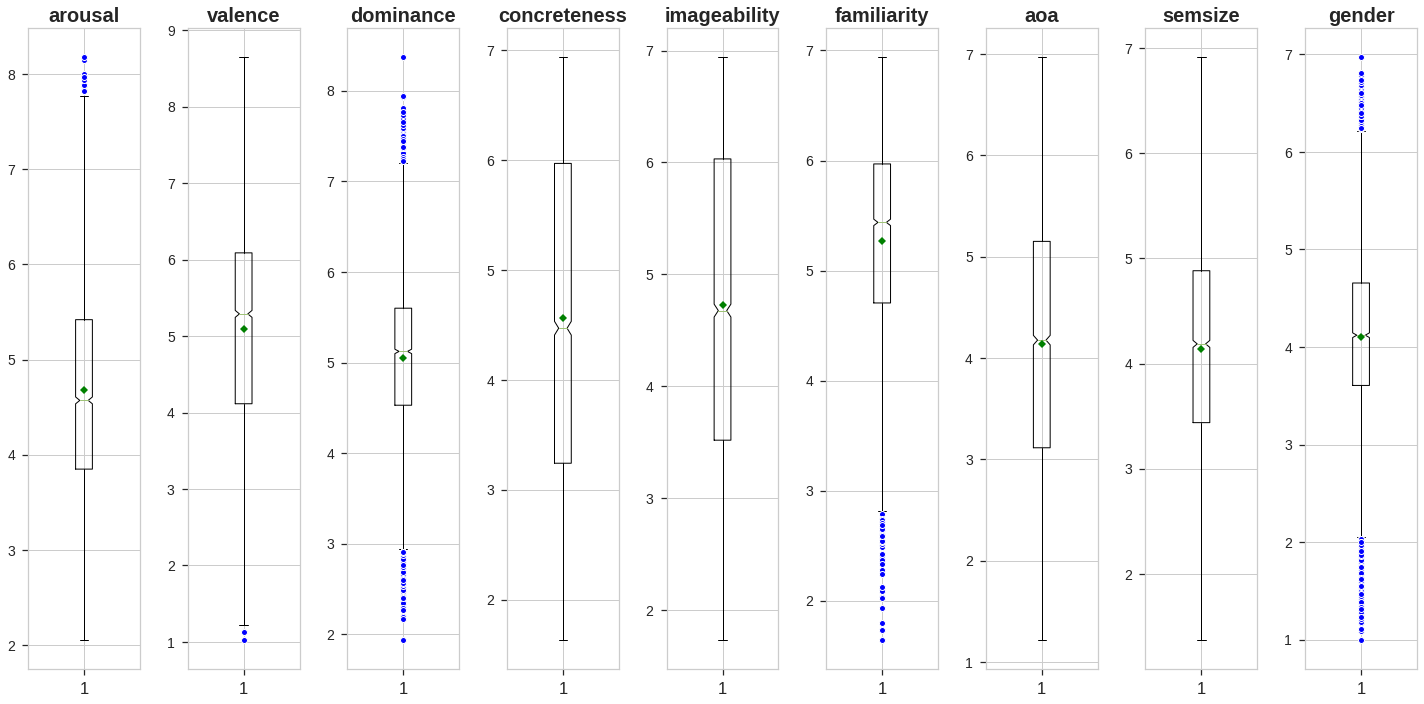

In [37]:
#displaying all boxplot in one plot

#defining outliers as a blue underscore circle
blue_circle = dict(markerfacecolor='blue', marker='o', markeredgecolor='white')

#defining fig, axs as plt.subplots. In the arguments we pass in that we want 1 row, and then the number of columns. 
#The number of columns will be equal to the length of df.columns. 
#Finally, we will set the figsize to 20 by 10.
fig, axs = plt.subplots(1, len(df3.columns), figsize=(20,10))

#defining the shape and color of the mean
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

#creating a small for loop which will loop over each of our plot axes. 
#Using the enumerate function here to keep track of i, our index value
for i, ax in enumerate(axs.flat):
    #addong in our boxplot by calling upon ax.boxplot() and passing in df.iloc, 
    #which allows us to get columns by the index variable, i. 
    #We do this by creating square brackets, with a colon followed by a comma. 
    #This tells the iloc function to get all rows, and then we pass in the column index. 
    #Next we specify our outlier properties and pass in red_circle.
    ax.boxplot(df3.iloc[:,i], flierprops=blue_circle, showmeans = True, meanprops =mean_shape, notch=True)
    ax.set_title(df3.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

First, some variables had to be dropped to perform this analysys with boxplots. "word" is not a numerical variable, and for that reason is not used in this plot. "web_corpus-freq" and "polysemy" can be analised on their own.

The plot shows that some variables are well distributed, like "concretness" and "imageability", while others are not, like "length", "arousal" and "dominance". 
Later this issue will be addressed with more depth.

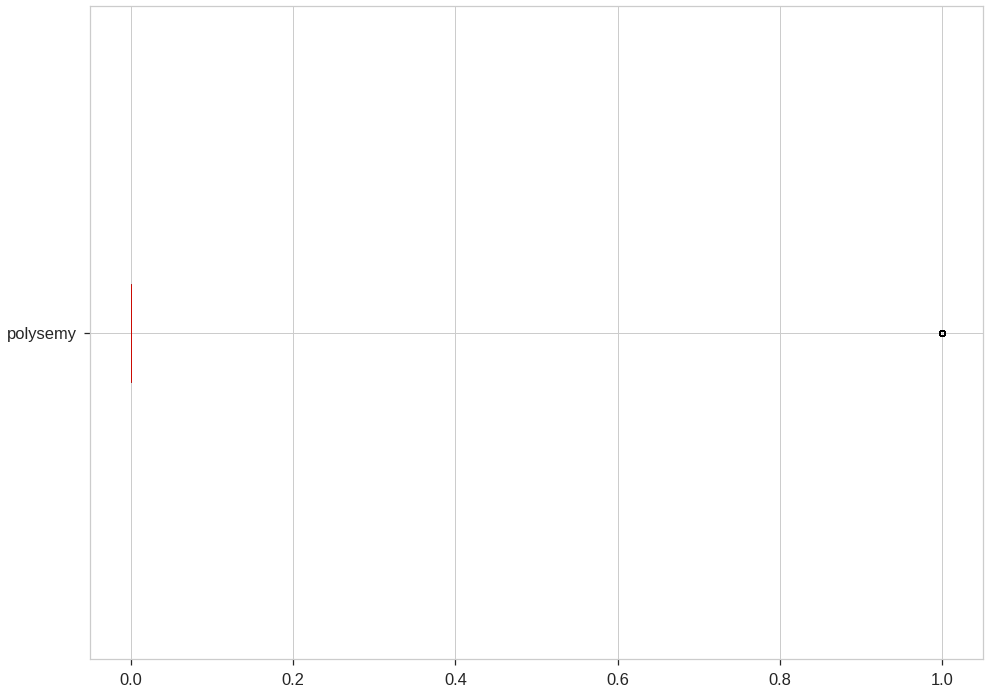

In [38]:
df["polysemy"].plot(kind="box", vert = False)

"polysemy" has only 2 possible values, 0 and 1, that are false and true. For that reason it doesn't have outliers.

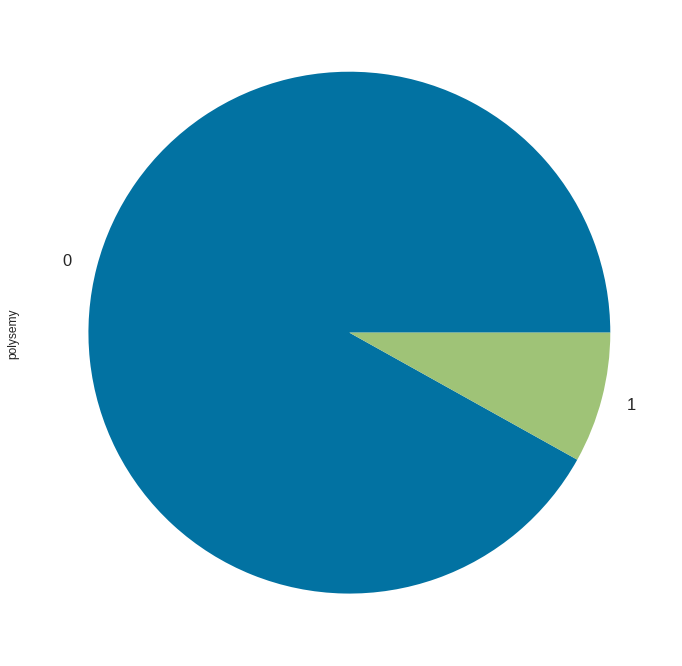

In [39]:
df["polysemy"].value_counts().plot(kind="pie")

"web_corpus_freq" instead seems to have a lot of outliers, as shown below.

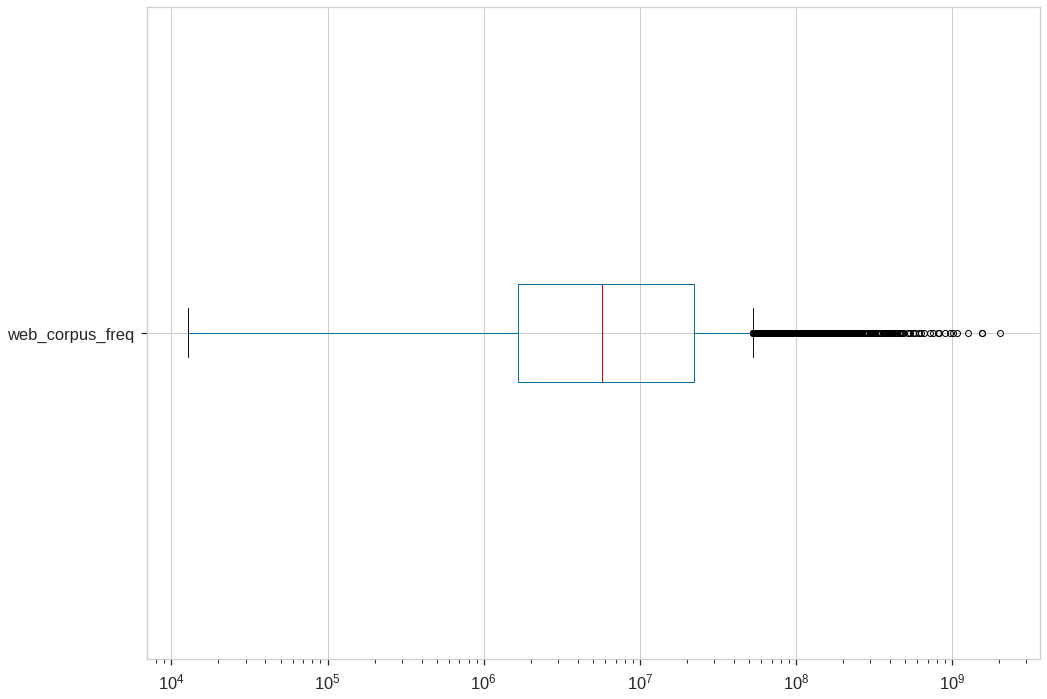

In [40]:
df["web_corpus_freq"].dropna(0, inplace = False).plot(kind="box", vert = False, logx=True)

### 1.3.3    Errors

In [41]:
var = ['arousal', 'valence', 'dominance', 'concreteness',
       'imageability', 'familiarity','semsize','gender','aoa']

for element in var:
  for e in df[element].values:
    if(type(e)!=np.float64):
       print(type(e))

  print("tutto ok fra")
    

tutto ok fra
tutto ok fra
tutto ok fra
tutto ok fra
tutto ok fra
tutto ok fra
tutto ok fra
tutto ok fra
tutto ok fra


In [42]:
#creating a copy of the df
df_errors = df.copy()

In [43]:
df_errors[["word", "length"]]

,word,length
0,abattoir,8
1,abbey,5
2,abbreviate,10
3,abdicate,8
4,abdication,10
...,...,...
4677,zeppelin,8
4678,zero,4
4679,zest,4
4680,zoo,3


In [44]:
df_errors["word"] = df_errors.word.str.len()

In [45]:
df_errors[["word", "length"]]

,word,length
0,8,8
1,5,5
2,10,10
3,8,8
4,10,10
...,...,...
4677,8,8
4678,4,4
4679,4,4
4680,3,3


In [46]:
df_errors["word"].equals(df_errors["length"])

True

All values of the variable 'word' are correct in regards of their length

### 1.3.4    Semantic Inconsistencies

## 1.4    Eventual other variable trasformations

## 1.5    Pairwise correlations and eventual elimination of variables

An overview of the relation between the nine variables is provided in Fig. 6. Where a correlation greater than |0.6| is found, we plotted the values of the two variables for a better visualization (fig. 7). 
There is a strong correlation (0.91) between concreteness and imageability: it is difficult to imagine an abstract word and easier to imagine a concrete one. Moreover, concreteness and imageability relate to the other variables similarly, with a margin of +-0.14. Therefore we merged them into a new variable, perceivability. The values of perceivabilty are the mean of concreteness and imageability values. 
Other positively correlated variables are valence and dominance, with 0.72: the more valuable an item is perceived, the higher the degree of control over the object. 
Familiary and age of acquisition are instead negatively related: from the pairplot (Fig \ref{fig:pairplot}) is apparent that every word acquired in early age is highly familiar. 

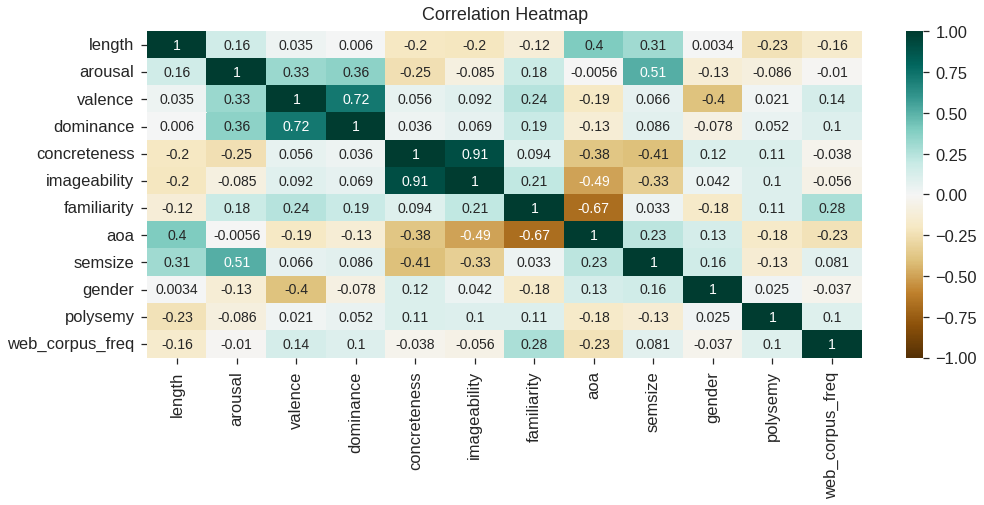

In [47]:
#matrice di correlazione
corr=df.corr()
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
#sb.heatmap(corr, cmap="Blues", annot=True)


In [48]:
#creating a copy of the df
dfpp = df.copy()
#dropping some variables for boxplot visualzation
dfpp1 = dfpp.drop(["word", "polysemy","length", 'gender', 'web_corpus_freq', 'semsize', 'arousal'], axis=1)

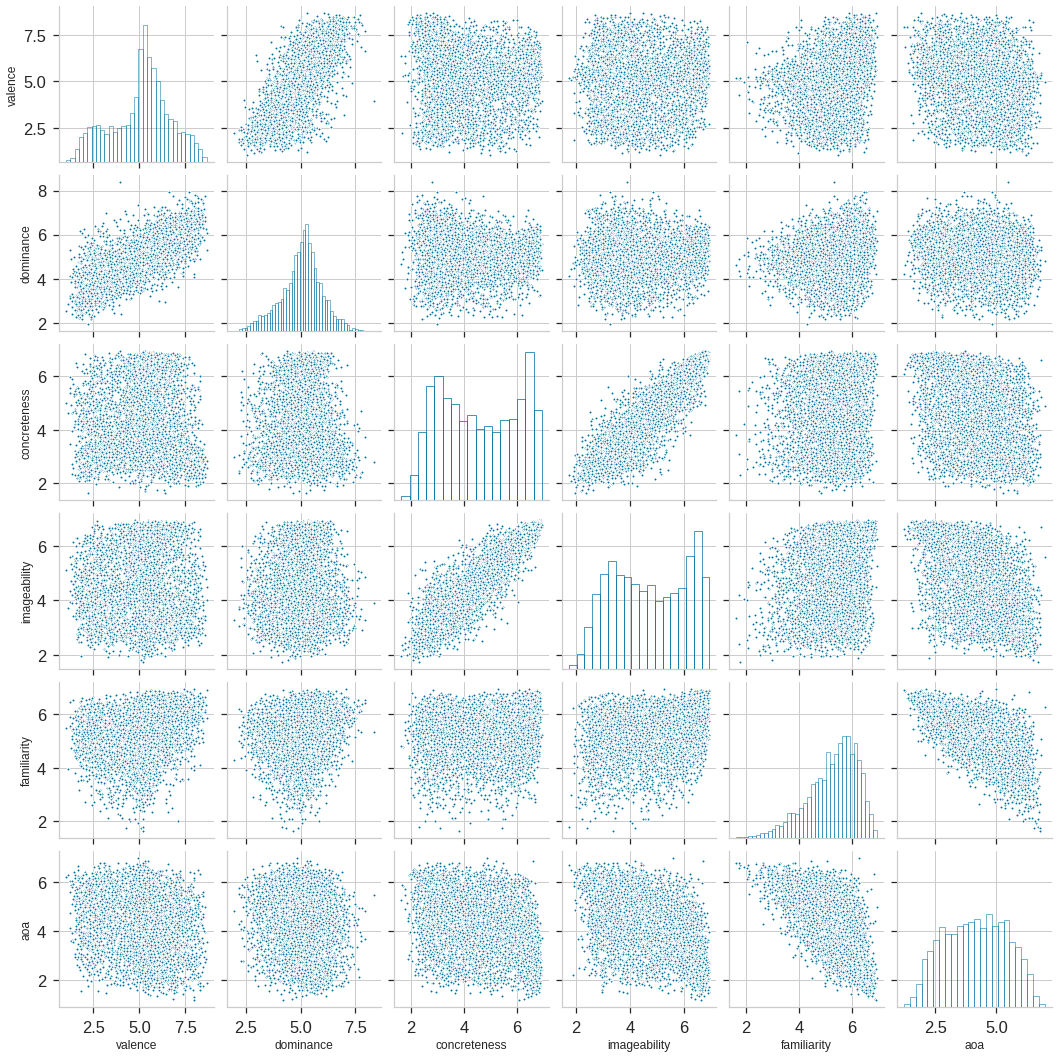

In [49]:
sb.pairplot(dfpp1, 
            plot_kws=dict(marker=".", linewidth=1),
            diag_kws=dict(fill=False),
            corner=False
           )

In [50]:
df2["perceivability"] = df2[["imageability", "concreteness"]].mean(axis=1)
df2.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,perceivability
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0,4.9230
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0,5.6250
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0,3.2315
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0,2.9415
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0,2.9315


In [51]:
df_perc=df2.drop(["concreteness","imageability"], axis=1)
df_perc.head()

,word,length,arousal,valence,dominance,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,perceivability
0,abattoir,8,4.200,2.864,4.333,2.382,6.760,4.652,5.391,0,160074.0,4.9230
1,abbey,5,3.125,5.781,4.667,3.324,5.177,5.121,3.303,0,4224864.0,5.6250
2,abbreviate,10,3.273,5.250,5.235,5.121,5.543,2.667,3.971,0,140105.0,3.2315
3,abdicate,8,4.194,3.767,4.419,3.971,6.233,4.679,5.167,0,124123.0,2.9415
4,abdication,10,3.846,3.880,4.800,3.097,6.407,5.083,4.571,0,128143.0,2.9315


# 2    Clustering

## 2.1    Preprocessing




In [52]:
dfprepro= df_perc.copy()

In [53]:
dfprepro.loc[(dfprepro['web_corpus_freq'].isnull() == True), 'web_corpus_freq'] = dfprepro['web_corpus_freq'].mean()


In [54]:
dfprepro[dfprepro['web_corpus_freq'].isnull()]

,word,length,arousal,valence,dominance,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,perceivability


In [55]:
dfprepro["web_corpus_log"] = pd.qcut(dfprepro["web_corpus_freq"], 10) #taglio la variabile web_corpus_freq in 10 gruppi
print(dfprepro[["web_corpus_log", "web_corpus_freq"]].groupby(["web_corpus_log"], as_index=False).mean())

               web_corpus_log  web_corpus_freq
0       (12769.999, 576274.9]     3.108691e+05
1       (576274.9, 1245702.2]     9.076956e+05
2      (1245702.2, 2226606.8]     1.693642e+06
3      (2226606.8, 3624286.0]     2.864687e+06
4      (3624286.0, 5728475.5]     4.666642e+06
5      (5728475.5, 9231532.2]     7.398287e+06
6     (9231532.2, 16184903.2]     1.235886e+07
7    (16184903.2, 31599671.0]     2.303482e+07
8    (31599671.0, 68973807.5]     4.732772e+07
9  (68973807.5, 2022459848.0]     1.980383e+08


In [56]:
dataframe = [dfprepro]

In [57]:
for dataset in dataframe:
    dataset.loc[(dataset["web_corpus_freq"] > 10000) & (dataset["web_corpus_freq"] <= 100000), "web_corpus_freq"] = 4
    dataset.loc[(dataset["web_corpus_freq"] > 100000) & (dataset["web_corpus_freq"] <= 1000000), "web_corpus_freq"] = 5
    dataset.loc[(dataset["web_corpus_freq"] > 1000000) & (dataset["web_corpus_freq"] <= 10000000), "web_corpus_freq"] = 6
    dataset.loc[(dataset["web_corpus_freq"] > 10000000) & (dataset["web_corpus_freq"] <= 100000000), "web_corpus_freq"] = 7
    dataset.loc[(dataset["web_corpus_freq"] > 100000000) & (dataset["web_corpus_freq"] <= 1000000000), "web_corpus_freq"] = 8
    dataset.loc[dataset["web_corpus_freq"] > 1000000000, "web_corpus_freq"] = 9
    
dfprepro.head()

,word,length,arousal,valence,dominance,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,perceivability,web_corpus_log
0,abattoir,8,4.200,2.864,4.333,2.382,6.760,4.652,5.391,0,5.0,4.9230,"(12769.999, 576274.9]"
1,abbey,5,3.125,5.781,4.667,3.324,5.177,5.121,3.303,0,6.0,5.6250,"(3624286.0, 5728475.5]"
2,abbreviate,10,3.273,5.250,5.235,5.121,5.543,2.667,3.971,0,5.0,3.2315,"(12769.999, 576274.9]"
3,abdicate,8,4.194,3.767,4.419,3.971,6.233,4.679,5.167,0,5.0,2.9415,"(12769.999, 576274.9]"
4,abdication,10,3.846,3.880,4.800,3.097,6.407,5.083,4.571,0,5.0,2.9315,"(12769.999, 576274.9]"


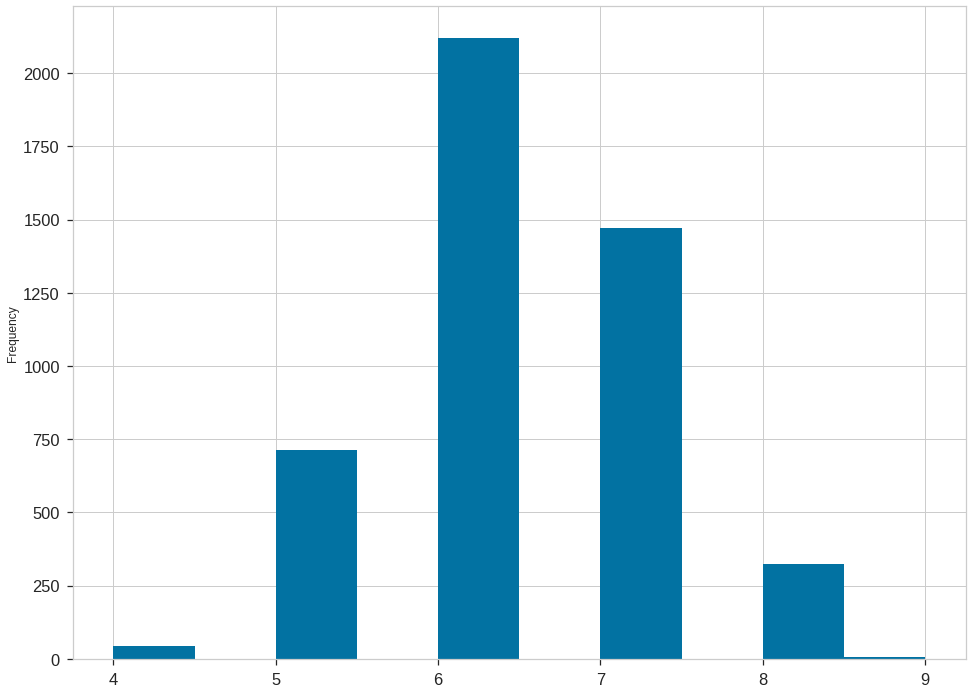

In [58]:
dfprepro["web_corpus_freq"].plot(kind="hist")

In [59]:
dfprepro['web_corpus_freq'].describe()

count    4682.000000
mean        6.285135
std         0.843987
min         4.000000
25%         6.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: web_corpus_freq, dtype: float64

In [60]:
dfprepro['web_corpus_log'].describe()

count                           4682
unique                            10
top       (68973807.5, 2022459848.0]
freq                             469
Name: web_corpus_log, dtype: object

In [61]:
dfprepro = dfprepro.drop(["word","web_corpus_log"], axis=1)
#dfprepro.loc[(dfprepro['web_corpus_freq'].isnull() == True), 'web_corpus_freq'] = dfprepro['web_corpus_freq'].mean()
dfprepro.isnull().sum()
dfprepro.head()

,length,arousal,valence,dominance,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,perceivability
0,8,4.200,2.864,4.333,2.382,6.760,4.652,5.391,0,5.0,4.9230
1,5,3.125,5.781,4.667,3.324,5.177,5.121,3.303,0,6.0,5.6250
2,10,3.273,5.250,5.235,5.121,5.543,2.667,3.971,0,5.0,3.2315
3,8,4.194,3.767,4.419,3.971,6.233,4.679,5.167,0,5.0,2.9415
4,10,3.846,3.880,4.800,3.097,6.407,5.083,4.571,0,5.0,2.9315


In [62]:
pca = PCA(n_components=2)
pca.fit(dfprepro)
PCA_df = pd.DataFrame(pca.transform(dfprepro))
pca.transform(dfprepro)
score_pca = pca.transform(dfprepro)

In [63]:
scaler = MinMaxScaler()

Y_pca=PCA_df.values

Y_pca_minmax = scaler.fit_transform(Y_pca)

scaled_dfprepro = pd.DataFrame(data = Y_pca_minmax, columns = PCA_df.columns)

scaled_dfprepro.head()

X=dfprepro.values

X_minmax = scaler.fit_transform(X)

df_xminmax = pd.DataFrame(data = X_minmax, columns = dfprepro.columns)



In [64]:
scaled_dfprepro.head()

,0,1
0,0.567559,0.141222
1,0.313091,0.396255
2,0.603087,0.434351
3,0.573763,0.250204
4,0.696536,0.292227


In [65]:
PCA_df.head()

,0,1
0,3.120256,-3.279911
1,-0.691649,-0.663581
2,3.652448,-0.272761
3,3.213184,-2.161888
4,5.052306,-1.730781


In [66]:
x = PCA_df[0]
y = PCA_df[1]
#z = PCA_df[2]
print(type (x))
print(type (y))
#print(type (z))
print(type (Y_pca_minmax))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [67]:
print (Y_pca_minmax)

[[0.5675594  0.14122187]
 [0.31309066 0.39625457]
 [0.60308653 0.43435069]
 ...
 [0.270277   0.54876721]
 [0.10023392 0.60693153]
 [0.45940086 0.47999567]]


## 2.2    Clustering analysis by K-Means

In [78]:
kmeans = KMeans( n_clusters=3, n_init=10, max_iter=100 )
kmeans.fit(Y_pca_minmax)

KMeans(max_iter=100, n_clusters=3)

In [69]:
kmeans.labels_

array([2, 1, 2, ..., 1, 1, 0], dtype=int32)

In [70]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(Y_pca_minmax, kmeans.labels_))

SSE 107.1169618212198
Silhouette 0.36741782484823476


In [71]:
silhouette_list = []

for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(Y_pca_minmax)
    silhouette_list.append( silhouette_score(Y_pca_minmax, kmeans.labels_))

KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: ignored

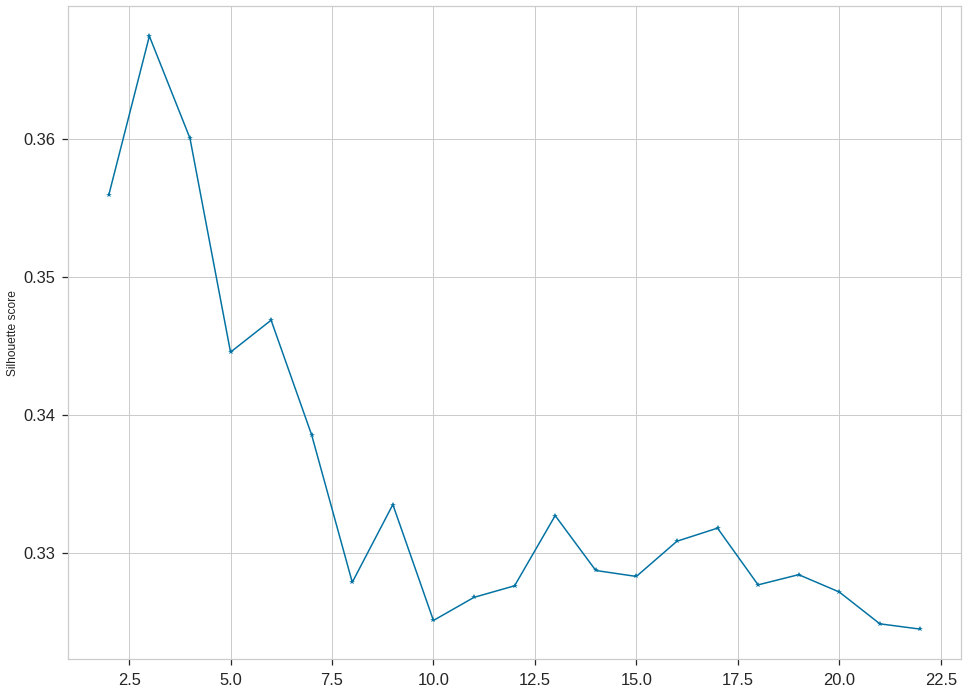

In [72]:
plt.plot(range(2, len(silhouette_list)+2), silhouette_list, marker='*')
plt.ylabel('Silhouette score')
plt.show()

In [79]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(Y_pca_minmax)

KMeans(max_iter=100, n_clusters=3)

In [80]:
centers = kmeans.cluster_centers_

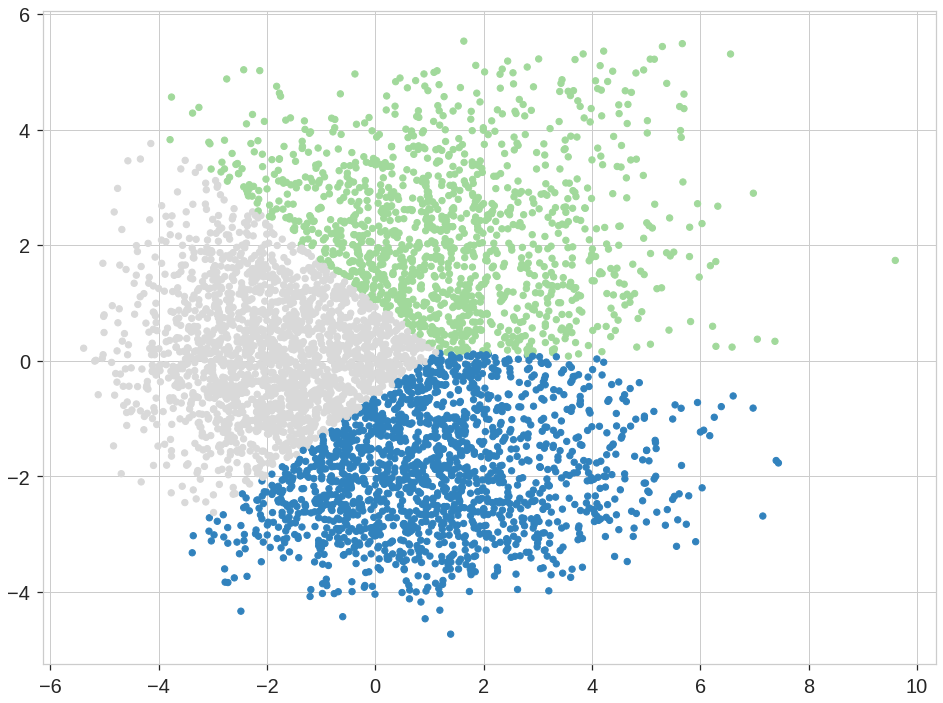

In [81]:
from matplotlib import cm
plt.scatter( Y_pca[:,0], Y_pca[:,1], s=40, c= kmeans.labels_ , cmap = cm.tab20c)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


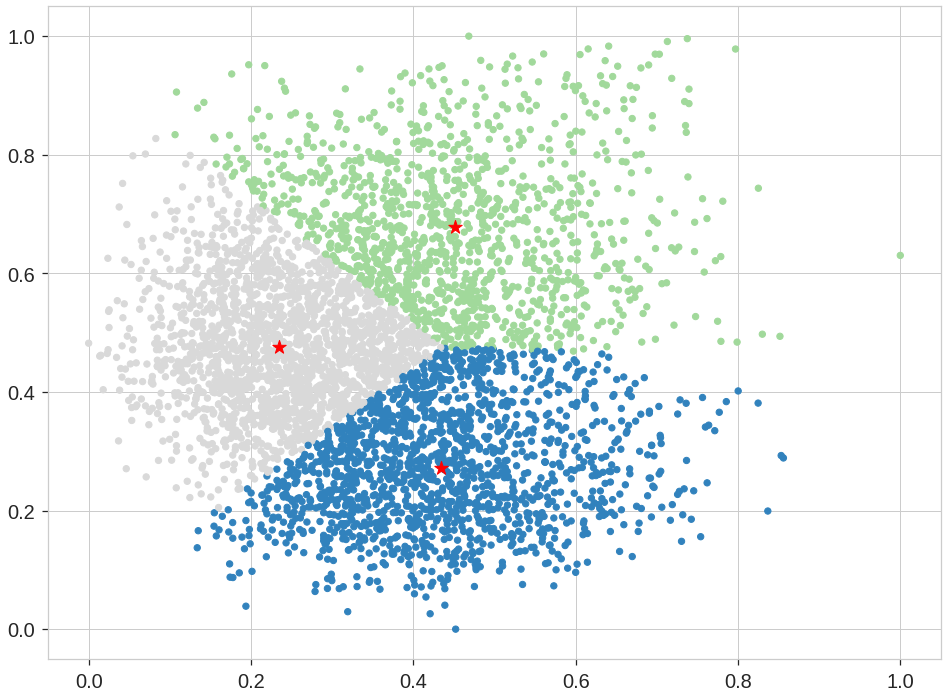

In [83]:
plt.scatter( Y_pca_minmax[:,0], Y_pca_minmax[:,1], s=40, c= kmeans.labels_ , cmap = cm.tab20c)
plt.scatter( centers[:,0], centers[:,1], c='red', marker='*', s=200 )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

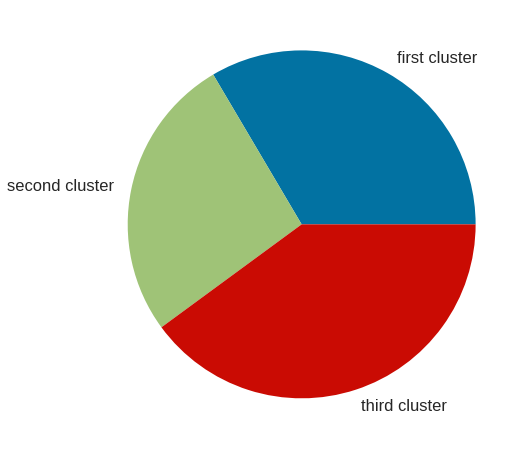

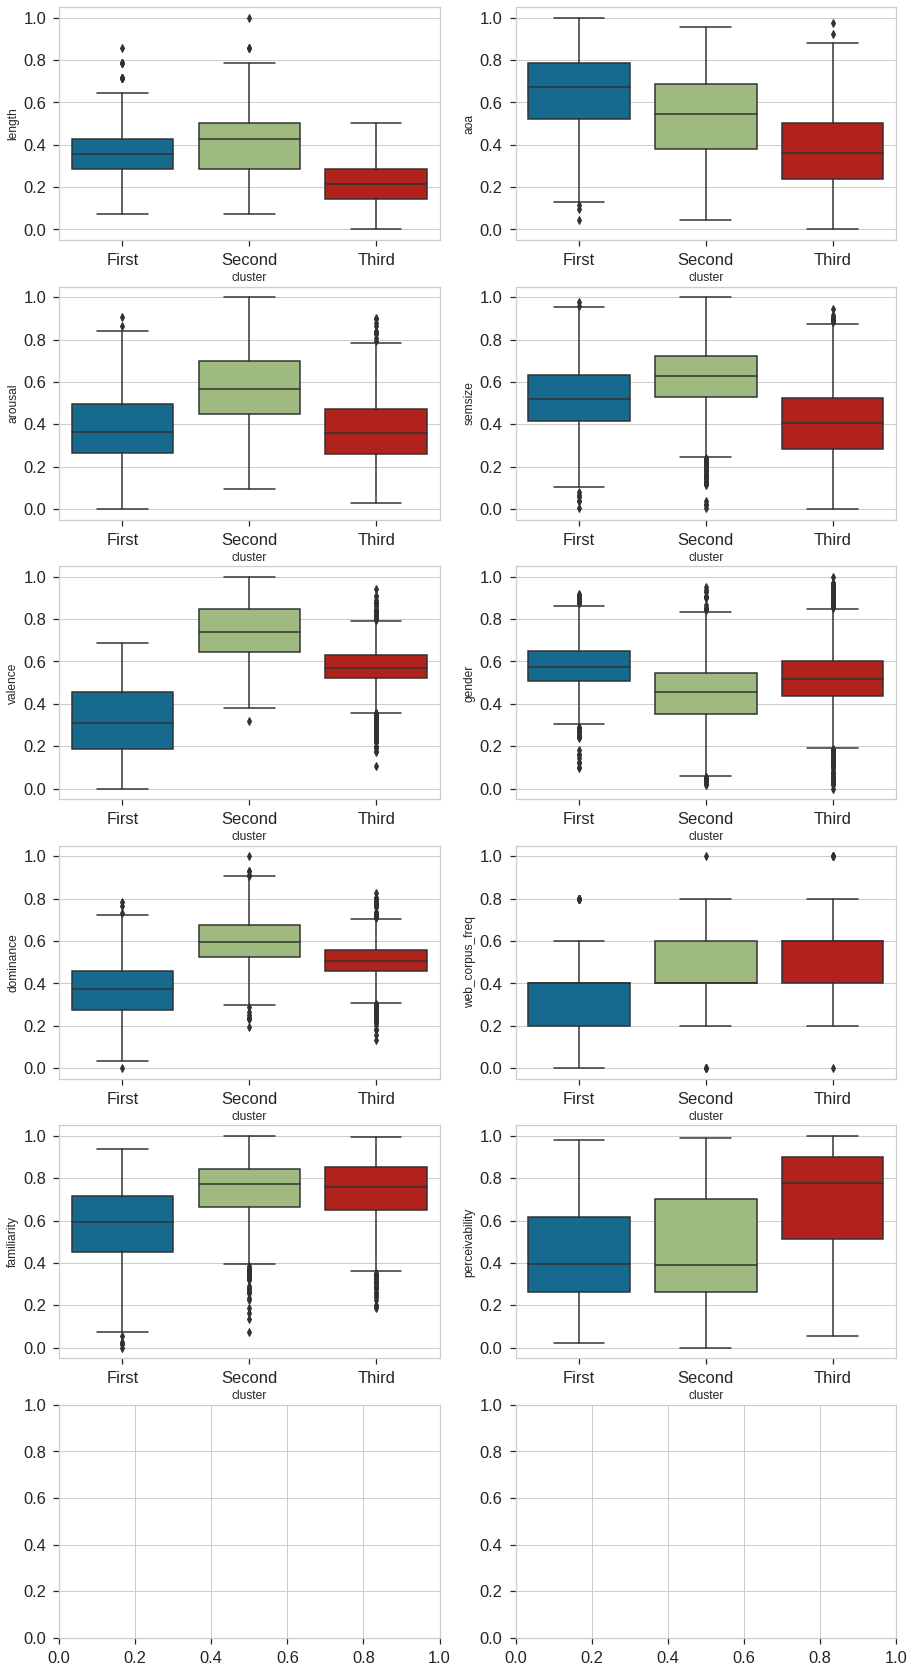

In [84]:
scaled_dfprepro['cluster'] = kmeans.labels_

df_xminmax['cluster'] = kmeans.labels_

df_xminmax['cluster']=df_xminmax['cluster'].map({0:'First', 1:'Second', 2:'Third'})

df_xminmax_plot=df_xminmax.drop(["polysemy"], axis=1)

plt.figure(figsize = (8,8))
pie = scaled_dfprepro.groupby(['cluster']).size().to_frame().reset_index()
pie.rename(columns={0: 'count'}, inplace=True)

pie_labels = ['first cluster', 'second cluster', 'third cluster']
plt.pie(pie['count'], labels=pie_labels)
plt.show()

fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15,30))
for cols, x in zip(df_xminmax_plot.columns[:5], range(5)):
    for y in range(1):
        sb.boxplot(y=cols, x='cluster', data=df_xminmax_plot, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )

for cols, x in zip(df_xminmax_plot.columns[5:], range(5)):
    for y in range(1,2):
        sb.boxplot(y=cols, x='cluster', data=df_xminmax_plot, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )

## 2.3    Analysis by density-based clustering

In [ ]:
dbscan = DBSCAN( eps=0.017, min_samples=20)
dbscan.fit(Y_pca_minmax)

In [ ]:
dbscan.labels_

In [ ]:
unique_labels, unique_counts = np.unique(dbscan.labels_, return_counts=True)
print(unique_labels)

In [ ]:
#cols = [col for col in PCA_df.columns if col != 'class']

plt.scatter( Y_pca_minmax[:,0], Y_pca_minmax[:,1], s=25, c= dbscan.labels_, cmap = cm.tab20 )

plt.xticks(fontsize=2)
plt.yticks(fontsize=2)

plt.show()

In [ ]:
scaled_dfprepro['cluster'] = dbscan.labels_

df_xminmax['cluster'] = dbscan.labels_

df_xminmax['cluster']=df_xminmax['cluster'].map({0:'First', 1:'Second', 2:'Third'})

## 2.4    Analysis by hierarchical clustering

In [ ]:
data_dist = pdist(Y_pca_minmax, metric='euclidean')
data_link = linkage(data_dist, method='ward')

res = dendrogram(data_link, truncate_mode='lastp')

In [ ]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hier.fit(Y_pca_minmax)
hier.labels_
hier.n_clusters_
#hier.n_leaves_

plt.scatter( Y_pca_minmax[:,0], Y_pca_minmax[:,1],s=50, c= hier.labels_, marker='.', cmap = cm.tab20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
scaled_dfprepro['cluster'] = hier.labels_

df_xminmax['cluster'] = hier.labels_

df_xminmax['cluster']=df_xminmax['cluster'].map({0:'First', 1:'Second', 2:'Third'})

df_xminmax_plot=df_xminmax.drop(["polysemy"], axis=1)

plt.figure(figsize = (8,8))
pie = scaled_dfprepro.groupby(['cluster']).size().to_frame().reset_index()
pie.rename(columns={0: 'count'}, inplace=True)

pie_labels = ['first cluster', 'second cluster', 'third cluster','fourth cluster', 'fifth cluster', 'sixth cluster']
plt.pie(pie['count'], labels=pie_labels)
plt.show()

fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15,30))
for cols, x in zip(df_xminmax_plot.columns[:5], range(5)):
    for y in range(1):
        sb.boxplot(y=cols, x='cluster', data=df_xminmax_plot, order=['First', 'Second','Third','Fourth', 'Fifth','Sixth'], ax=axs[x,y], showfliers = True )

for cols, x in zip(df_xminmax_plot.columns[5:], range(5)):
    for y in range(1,2):
        sb.boxplot(y=cols, x='cluster', data=df_xminmax_plot, order=['First', 'Second','Third','Fourth', 'Fifth','Sixth'], ax=axs[x,y], showfliers = True )

In [ ]:
scaled_dfprepro['cluster'] = hier.labels_

df_xminmax['cluster'] = hier.labels_

df_xminmax['cluster']=df_xminmax['cluster'].map({0:'First', 1:'Second', 2:'Third'})

df_xminmax_plot=df_xminmax.drop(["polysemy"], axis=1)

plt.figure(figsize = (8,8))
pie = scaled_dfprepro.groupby(['cluster']).size().to_frame().reset_index()
pie.rename(columns={0: 'count'}, inplace=True)

pie_labels = ['first cluster', 'second cluster', 'third cluster']
plt.pie(pie['count'], labels=pie_labels)
plt.show()

fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15,30))
for cols, x in zip(df_xminmax_plot.columns[:5], range(5)):
    for y in range(1):
        sb.boxplot(y=cols, x='cluster', data=df_xminmax_plot, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )

for cols, x in zip(df_xminmax_plot.columns[5:], range(5)):
    for y in range(1,2):
        sb.boxplot(y=cols, x='cluster', data=df_xminmax_plot, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )

In [ ]:
# non serve ora 
#hier = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
#hier.fit(Y_pca_minmax)
#hier.labels_


#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(Y_pca_minmax[:,0], Y_pca_minmax[:,1], Y_pca_minmax[:,2], s=5, c= hier.labels_, marker='.')


#ax.plot3D(Yemo[:,1], Yemo[:,2], Yemo[:,3], c= hier.labels_, marker='.')

#plt.scatter( Yemo[:,1], Yemo[:,2], s=50, c= hier.labels_, marker='.' )



#plt.show()

## 2.5   Final Discussion